 <H1> COVID-19 Analysis </H1>

<h2><i>Project by:</i></h2>
<p><b>PRASFUR TIWARI</b></p>
<p><b>DIVYANSH TIWARI</b></p>
<p><b>SONAM KUMAR</b></p>

<h2>About COVID-19</h2>
<p>Short for Corona Virus disease 2019, COVID-19 is an infectious disease caused by <b>severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)</b>. It was first identified in <b><i>December 2019 in Wuhan, China,</i></b> and has since spread globally, resulting in an ongoing pandemic.</p>
<p></p>
<p>For more details about COVID-19, visit its wikipedia page from <a href="https://en.wikipedia.org/wiki/Coronavirus_disease_2019">here</a>.</p>
<img src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/1800x1200_virus_3d_render_red_03_other.jpg?resize=*:350px" alt="Image of Corona Virus"/> 

<p></p>
<h2>About Our Project</h2>
<p>In this project, we intent to analyse the effects of COVID-19 in <b>India</b>, before lockdown. We will be analyzing the total number of confirmed, cured and death cases. Our analysis will be based on 4 main factors:
    <ol>
        <li>Day-wise Analysis</li>
        <li>State-wise Analysis</li>
        <li>Population-wise Analysis</li>
        <li>Age-wise Analysis</li>
    </ol>
</p>
<p>Also, we will be predicting the possible number of infected cases if there was no/delayed lockdown, so as to estimate the success of lockdown.</p> 

<p></p>
<p></p>
<p></p>

<h2>Data Analysis</h2>

<h3>Importing needed modules</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime 
import folium
from geopy.geocoders import Nominatim
import requests
import warnings
warnings.filterwarnings('ignore')
#from pylab import rcParams

<h3>Importing Necessary CSVs and Converting them to pandas dataframe</h3>

In [ ]:
df_population=pd.read_csv('https://raw.githubusercontent.com/DivyT-03/Project/master/population_india_census2011.csv')
df_population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [ ]:
df_main=pd.read_csv('https://raw.githubusercontent.com/DivyT-03/Project/master/covid_19_india(16.4.20).csv')
df_main.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df_main.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

<h3>Removing Unnecessary Columns</h3>

In [ ]:
df=df_main[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


<h3>Creating List of States, Dates and Columns to make the final dataframe</h3>

In [ ]:
state=df_population['State / Union Territory'].tolist()
state.sort()
print("Total states + union territories:",len(state))

Total states + union territories: 36


In [ ]:
dates=list(df.Date.unique())
print("Total days:",len(dates))

Total days: 108


<h3>Creating Various Lists of Values to be inserted in Dataframe columns</h3>

In [ ]:
col=["Day","State_ID","Cured","Deaths","Confirmed"]
Date_ID=[]
State_ID=[]
Cured=[]
Deaths=[]
Confirmed=[]
    
for d_id,d in enumerate(dates,1):
 
    for s_id,s in enumerate(state,1):
        
        df_val=df[df["Date"]==d]
        df_val=df_val[df_val["State/UnionTerritory"]==s]
        
        Date_ID.append(d_id)
        State_ID.append(s_id)
        
        try:
            Cu=df_val.Cured.to_list()[0]
            De=df_val.Deaths.to_list()[0]
            Co=df_val.Confirmed.to_list()[0]
        except:
            Cu=0
            De=0
            Co=0
 
        Cured.append(Cu)
        Deaths.append(De)
        Confirmed.append(Co)

<h2>Making the final dataframe</h2>

In [ ]:
list_of_tuples = list(zip(Date_ID,State_ID,Cured,Deaths,Confirmed))  
df_cv = pd.DataFrame(list_of_tuples, columns = col)
df_cv.head()

,Day,State_ID,Cured,Deaths,Confirmed
0,1,1,0,0,0
1,1,2,0,0,0
2,1,3,0,0,0
3,1,4,0,0,0
4,1,5,0,0,0


In [ ]:
print("Our dataset has {} rows and {} columns".format(df_cv.shape[0],df_cv.shape[1]))

Our dataset has 3888 rows and 5 columns


<h2>Data Cleaning</h2>

In [ ]:
df_cv.isnull()

,Day,State_ID,Cured,Deaths,Confirmed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3883,False,False,False,False,False
3884,False,False,False,False,False
3885,False,False,False,False,False
3886,False,False,False,False,False


In [ ]:
df_cv.isnull().sum()

Day          0
State_ID     0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

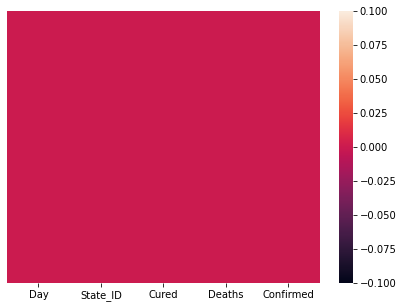

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=7,5
sns.heatmap(df_cv.isnull(),yticklabels=False)
plt.show()

<p><b>As there are no null values in our dataframe, we do not need to perform any clean-up.</b></p>

<h2>Descriptive Statistics</h2>

In [ ]:
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Day        3888 non-null   int64
 1   State_ID   3888 non-null   int64
 2   Cured      3888 non-null   int64
 3   Deaths     3888 non-null   int64
 4   Confirmed  3888 non-null   int64
dtypes: int64(5)
memory usage: 152.0 KB


In [ ]:
df_cv.describe()

,Day,State_ID,Cured,Deaths,Confirmed
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,54.500000,18.500000,94.222737,11.428498,353.127058
std,31.179588,10.389631,400.506480,62.268418,1592.878800
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,27.750000,9.750000,0.000000,0.000000,0.000000
50%,54.500000,18.500000,0.000000,0.000000,1.000000
75%,81.250000,27.250000,10.000000,1.000000,41.000000
max,108.000000,36.000000,6564.000000,1068.000000,29100.000000


In [ ]:
df_cv.dtypes

Day          int64
State_ID     int64
Cured        int64
Deaths       int64
Confirmed    int64
dtype: object

In [ ]:
population=[]
for s in state:
    df_val=df_population[df_population["State / Union Territory"]==s]
    Po=df_val.Population.tolist()
    population.append(Po)
 
list_of_tuples = list(zip(state,State_ID,population))  
df_stateinfo = pd.DataFrame(list_of_tuples, columns = ["State","State ID", "Population"])
df_stateinfo.head()

,State,State ID,Population
0,Andaman and Nicobar Islands,1,[380581]
1,Andhra Pradesh,2,[49577103]
2,Arunachal Pradesh,3,[1383727]
3,Assam,4,[31205576]
4,Bihar,5,[104099452]


<h2>Correlation</h2>

In [ ]:
df_cv.corr()

,Day,State_ID,Cured,Deaths,Confirmed
Day,1.000000,0.000000,0.332959,0.244722,0.293391
State_ID,0.000000,1.000000,0.044153,0.024726,0.039588
Cured,0.332959,0.044153,1.000000,0.836089,0.926386
Deaths,0.244722,0.024726,0.836089,1.000000,0.931426
Confirmed,0.293391,0.039588,0.926386,0.931426,1.000000


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Confirmed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.29339149322005065  with a P-value of P = 4.835636472628199e-78


<h4>Observation:</h4>
Since the p-value is < 0.001, the correlation between Day and Confirmed Cases is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.293).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Cured'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3329585015945168  with a P-value of P = 2.7013657693100543e-101


<h4>Observation:</h4>
Since the p-value is < 0.001, the correlation between Day and Cured Patients is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.333).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.24472239126055229  with a P-value of P = 4.015735020157154e-54


<h4>Observation</h4>
Since the p-value is < 0.001, the correlation between Day and Deaths is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.244).

In [ ]:
df_cv.head()

,Day,State_ID,Cured,Deaths,Confirmed
0,1,1,0,0,0
1,1,2,0,0,0
2,1,3,0,0,0
3,1,4,0,0,0
4,1,5,0,0,0


<h2>Data Visualization</h2>

<p>We take the data of only 56 days from the beginning, i.e. data till first lockdown, and keep the rest of the data for prediction.</p>

In [ ]:
df_cv1=df_cv[df_cv['Day']<57]

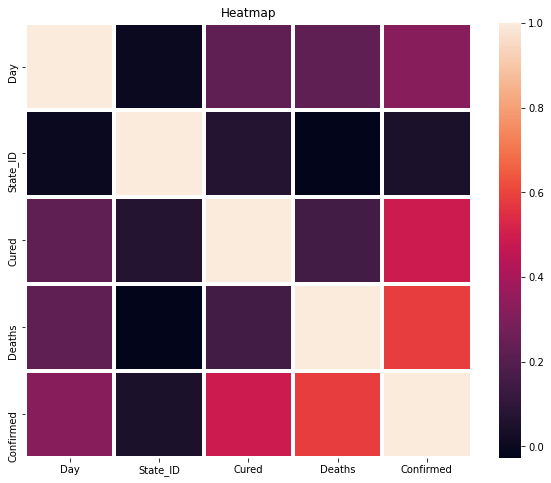

In [ ]:
# Plotting the heatmap of the data set
plt.figure(figsize=(10,8))
sns.heatmap(df_cv1.corr(),linewidths=3)
plt.title('Heatmap')
plt.show()

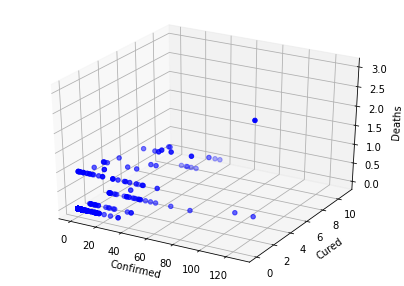

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df_cv1['Confirmed'],df_cv1['Cured'],df_cv1['Deaths'],c='b',marker='o')
ax.set_xlabel('Confirmed')
ax.set_ylabel('Cured')
ax.set_zlabel('Deaths')
plt.show()

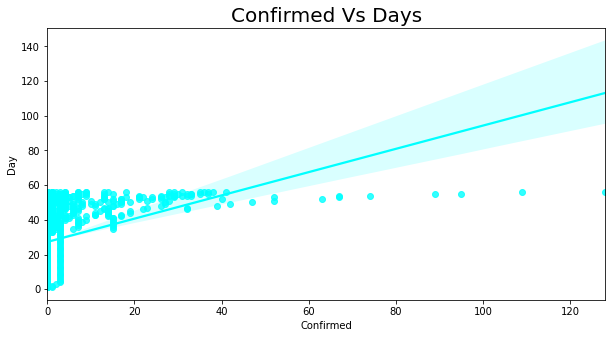

In [ ]:
# Relation between Confirmed Cases and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Day'],color='aqua')
plt.title('Confirmed Vs Days',size=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

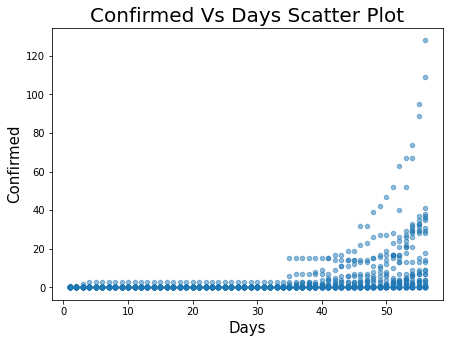

In [ ]:
# Scatter Plot Between Confirmed Cases and Days
plt.figure(1,figsize=(20,10))
df_cv1.plot(kind='scatter',y='Confirmed',x='Day',alpha=.5)
plt.xlabel('Days',size=15)
plt.ylabel('Confirmed',size=15)
plt.title('Confirmed Vs Days Scatter Plot',size=20)
plt.show()

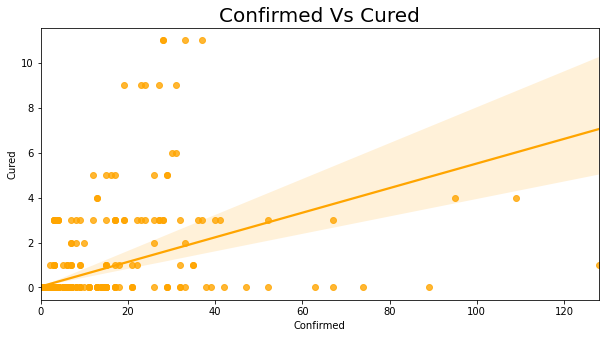

In [ ]:
# Relation between Confirmed Cases and Cured Cases
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Cured'],color='orange')
plt.title('Confirmed Vs Cured',size=20)
plt.show()

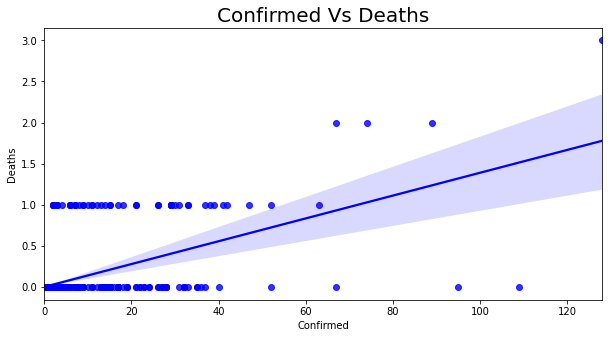

In [ ]:
# Relation between Confirmed Cases and Deaths
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Deaths'],color='Blue')
plt.title('Confirmed Vs Deaths',size=20)
plt.show()

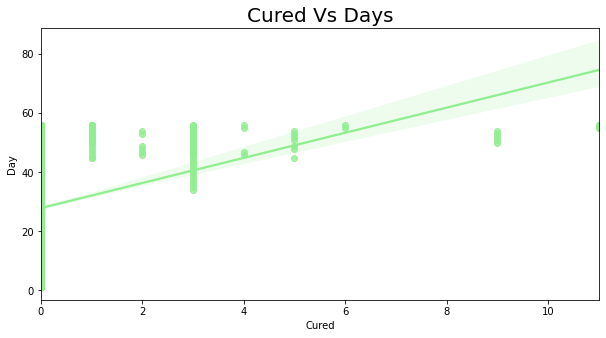

In [ ]:
# Relation between Cured Cases and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Cured'],df_cv1['Day'],color='LightGreen')
plt.title('Cured Vs Days',size=20)
plt.show()

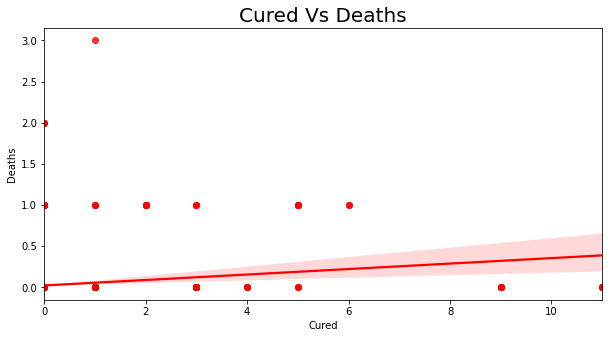

In [ ]:
# Relation between Cured Cases and Deaths
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Cured'],df_cv1['Deaths'],color='Red')
plt.title('Cured Vs Deaths',size=20)
plt.show()

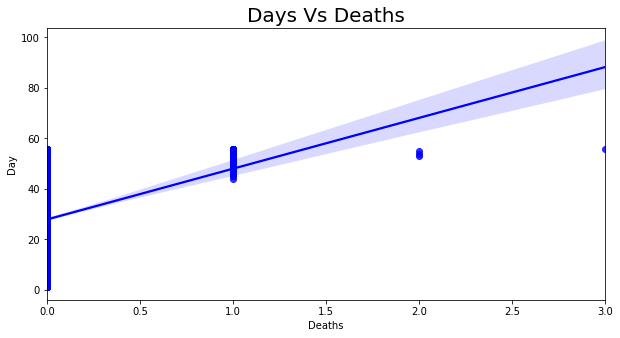

In [ ]:
# Relation between Deaths and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Deaths'],df_cv1['Day'],color='Blue')
plt.title('Days Vs Deaths',size=20)
plt.show()

<h1>Day-wise analysis</h1>

In [ ]:
df2=df_cv1.copy()
df2.drop(columns=["State_ID"],axis=1,inplace=True)
df2=df2.groupby(['Day']).sum()
df2.reset_index(inplace=True)
df2.head()

,Day,Cured,Deaths,Confirmed
0,1,0,0,1
1,2,0,0,1
2,3,0,0,2
3,4,0,0,3
4,5,0,0,3


<h2>1. Confirmed Cases' Plots</h2>

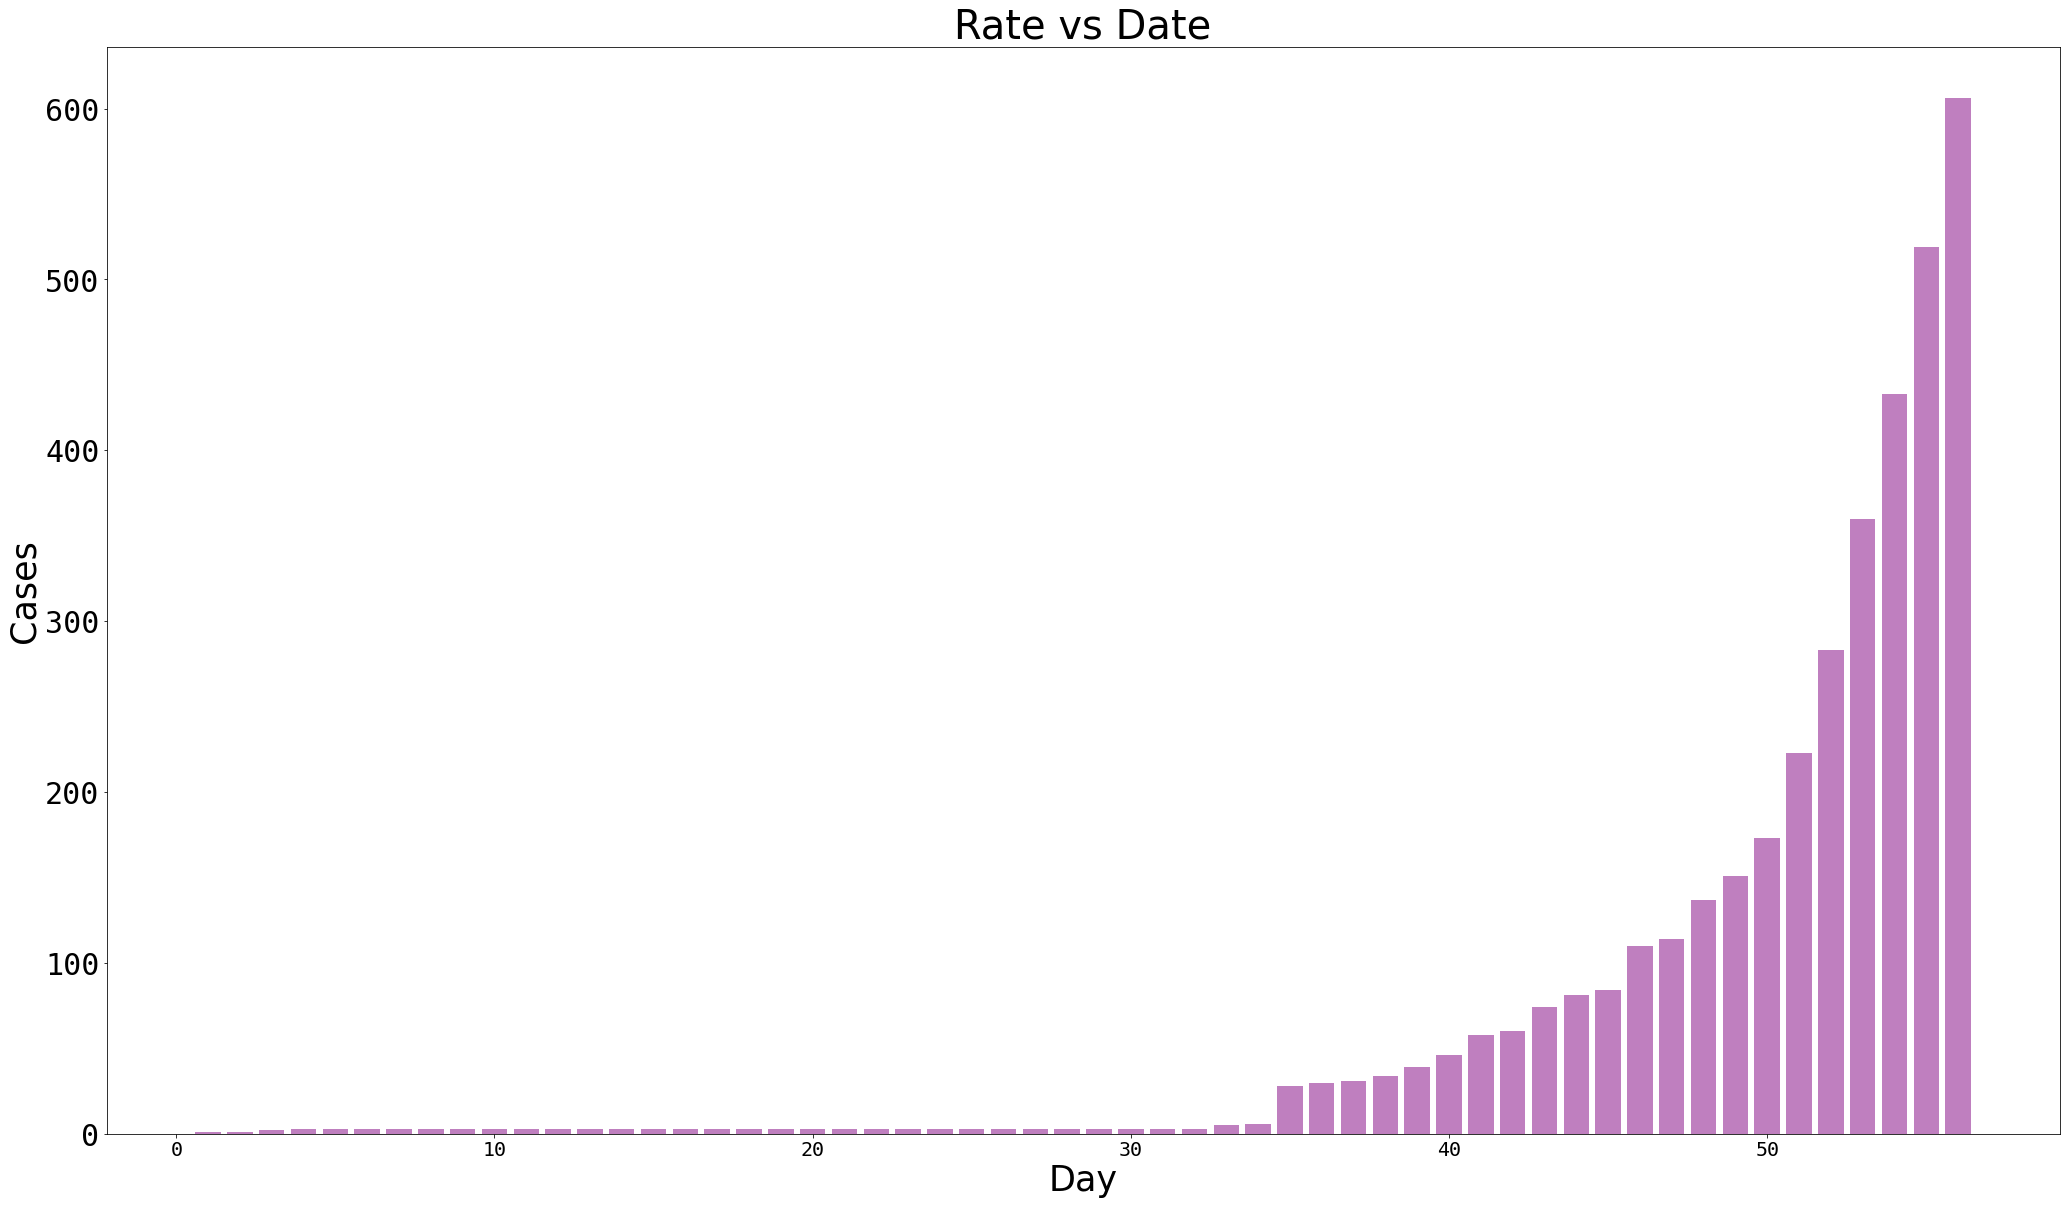

In [ ]:
plt.figure(figsize=(35,20))
plt.bar(df2['Day'],df2['Confirmed'],align='center',alpha=0.5,color='purple')
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

In [ ]:
print("Confirmed cases:",df2['Confirmed'].max())

Confirmed cases: 606


<h4>The curve depicts the exponential increase in the infected rates.</h4>

<h2>2. Cured Rate's Plot</h2>

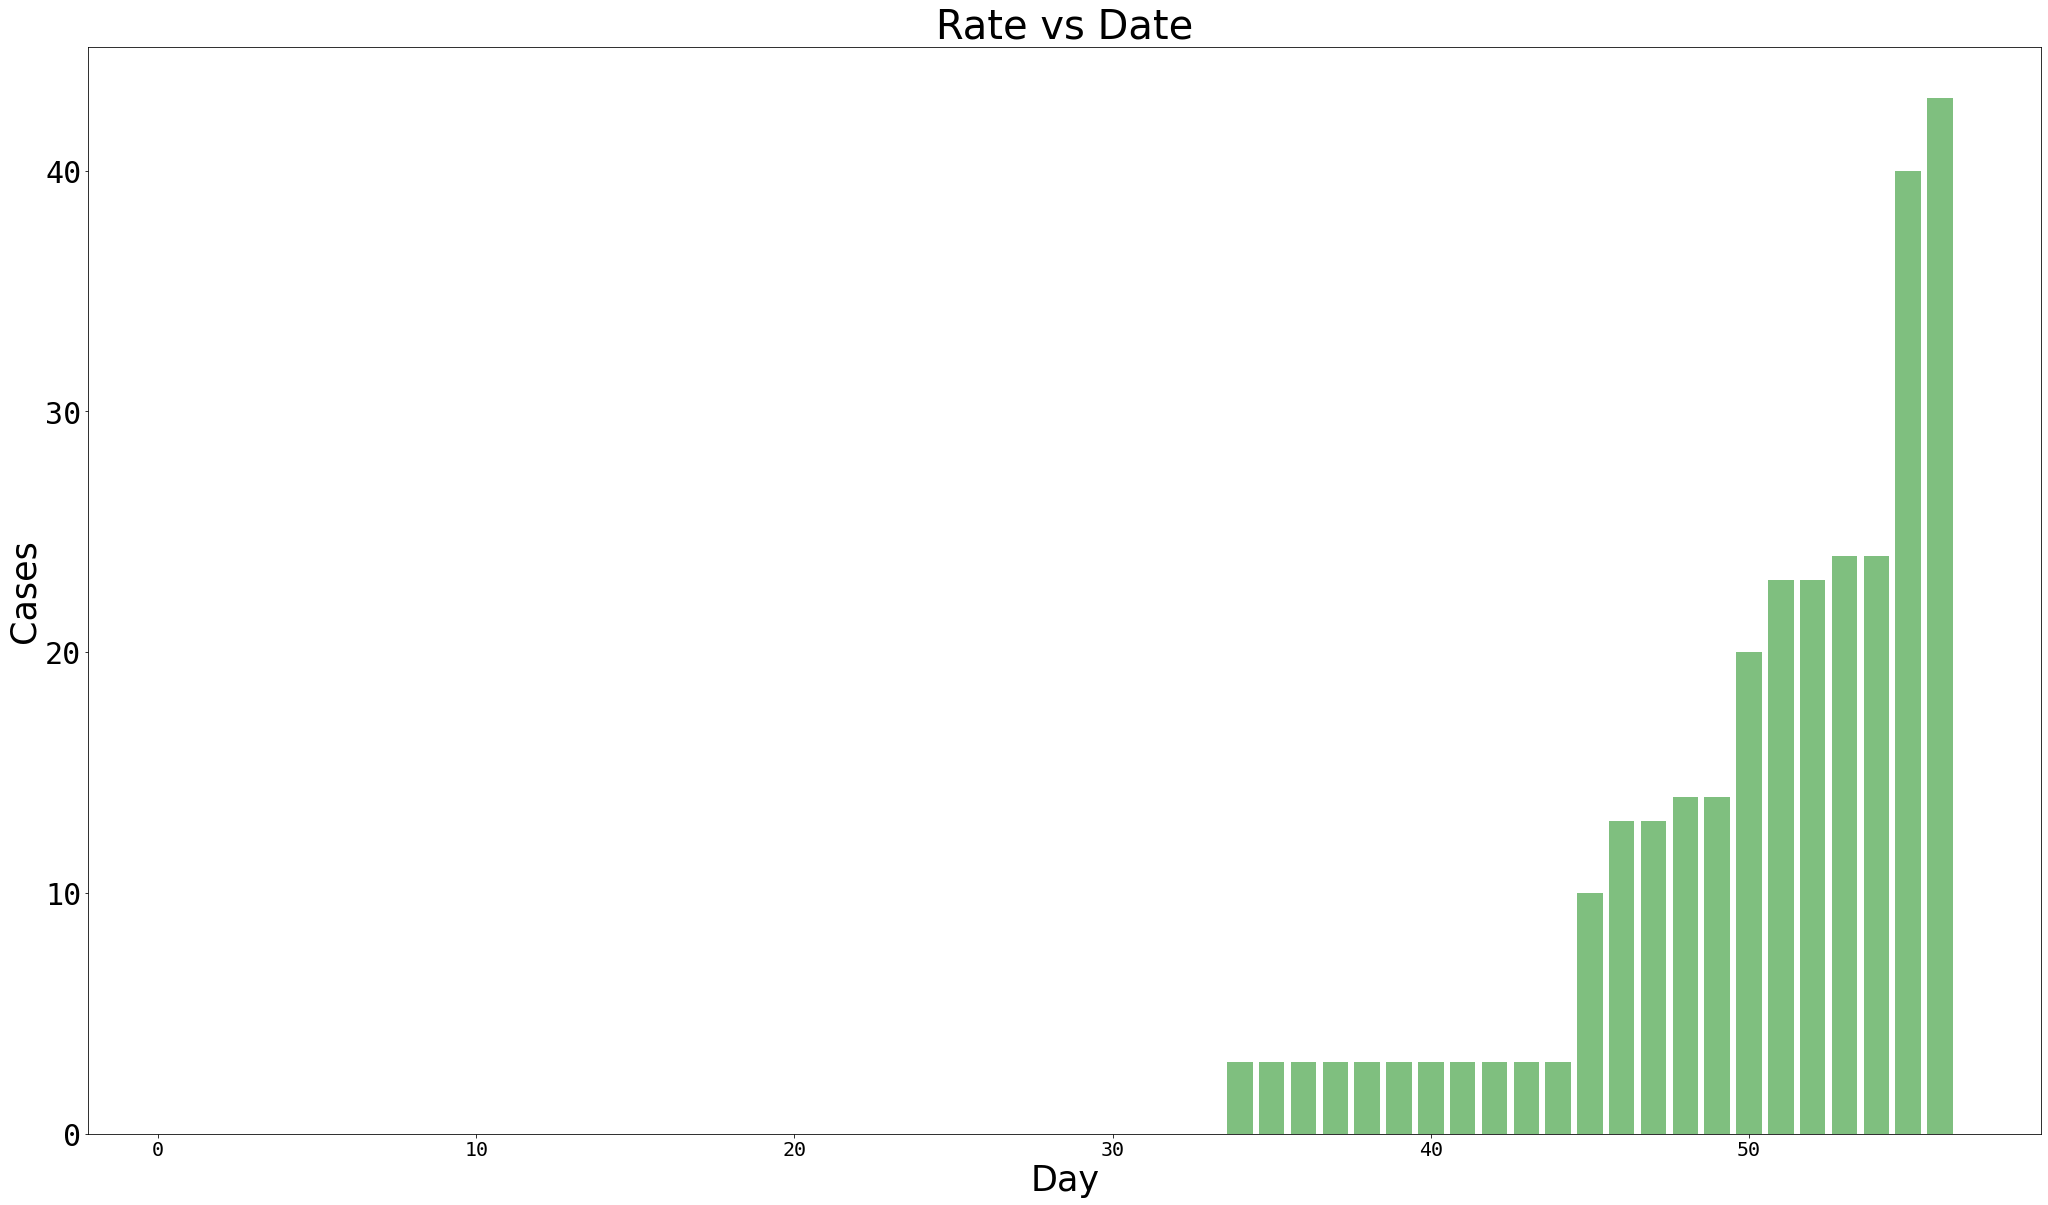

In [ ]:
d3=df2.copy()
plt.figure(figsize=(35,20))
plt.bar(d3['Day'],d3['Cured'],align='center',alpha=0.5,color="Green")
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

<h2>3. Death Rate's Plots</h2>

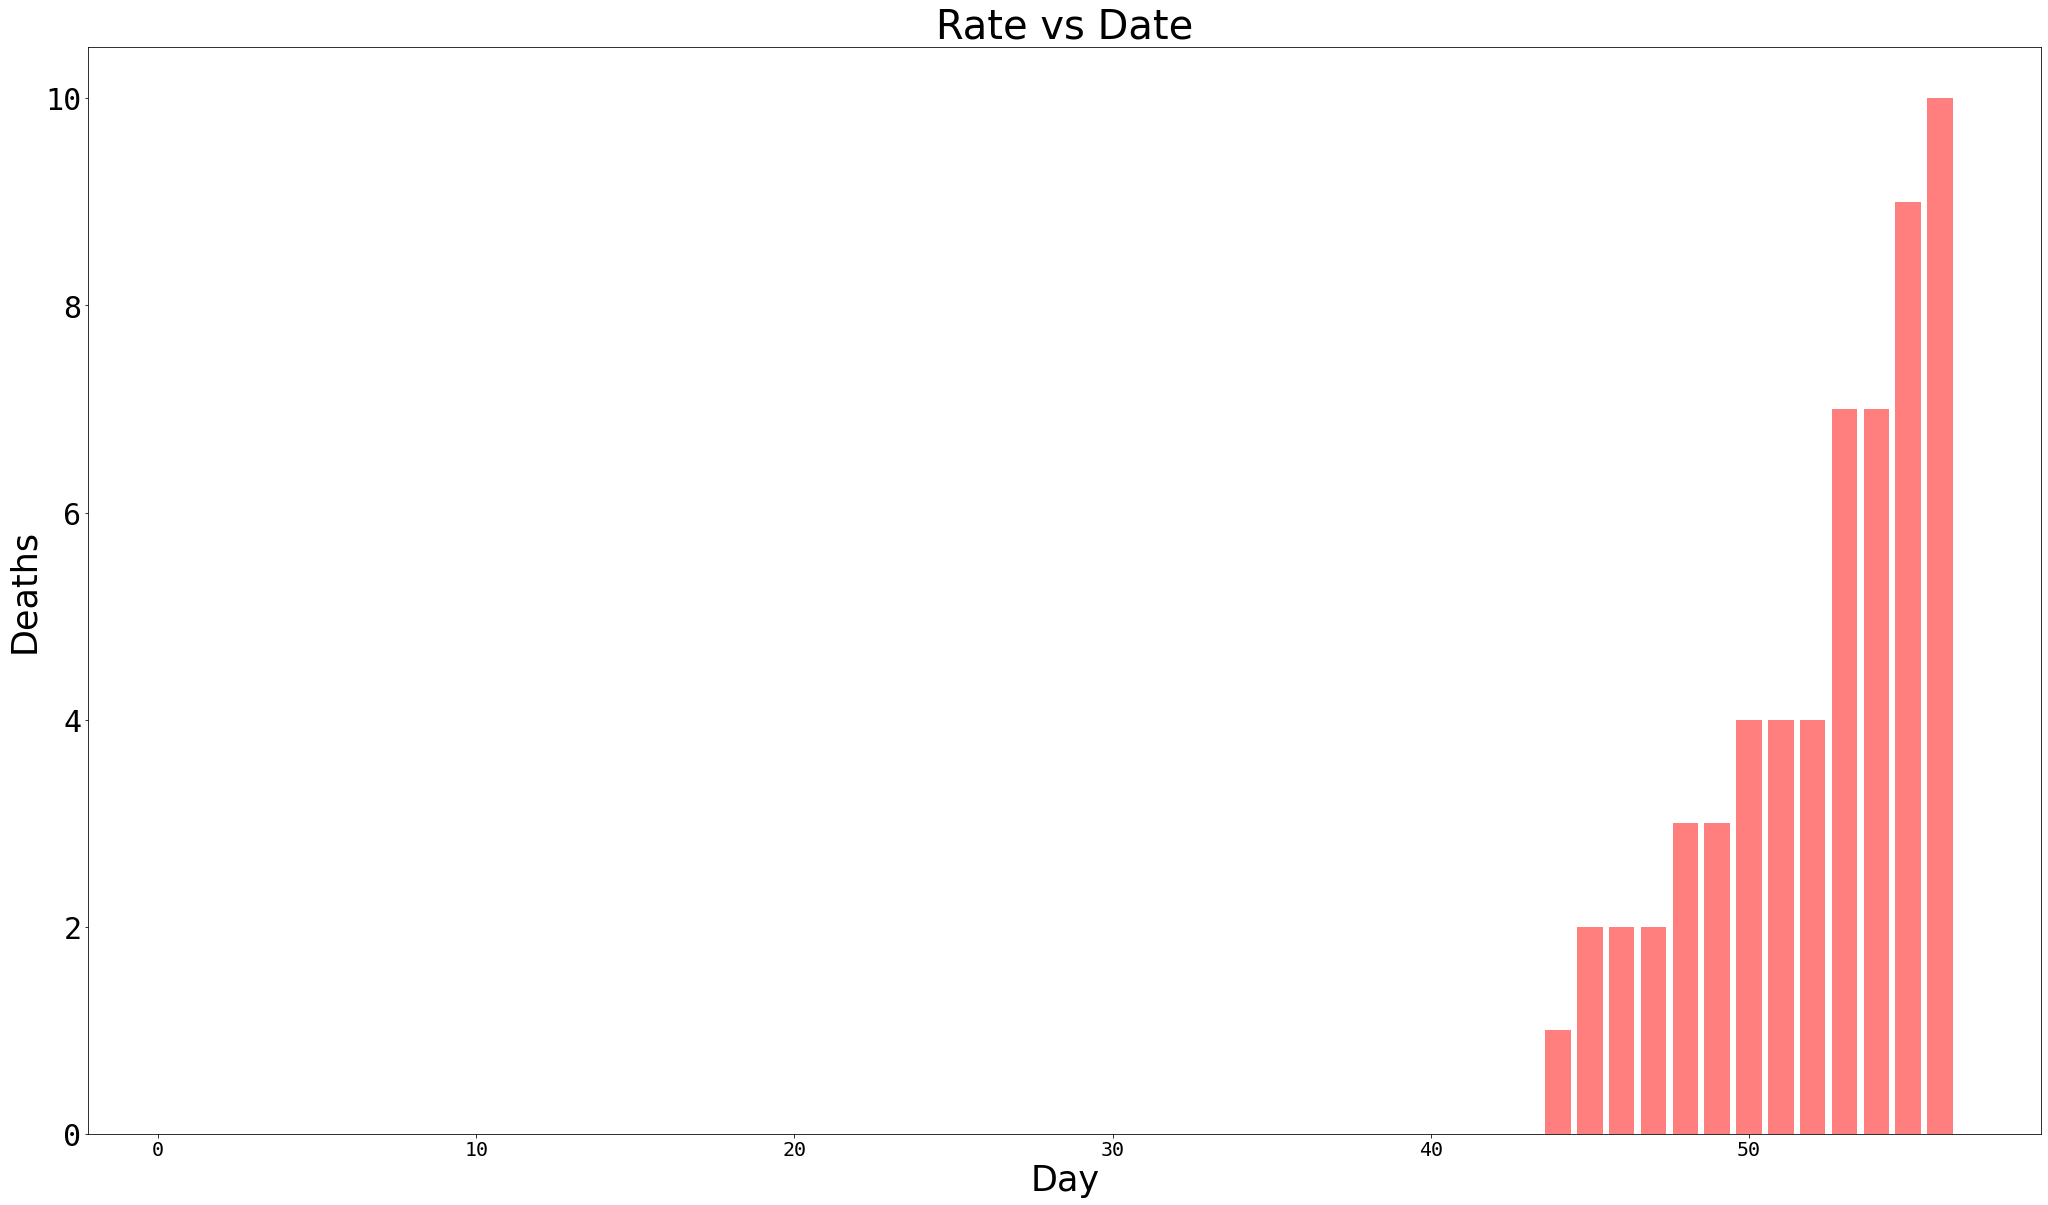

In [ ]:
d4=df2.copy()
plt.figure(figsize=(35,20))
plt.bar(d4['Day'],d4['Deaths'],align='center',alpha=0.5,color="Red")
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Deaths",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

<h4>From the plots, it's utterly significant that the confirmed, cured and the death rates rose exponentially.</h4>

In [ ]:
a=df2['Confirmed'].max()
b=df2['Cured'].max()
c=df2['Deaths'].max()
d=df2['Cured'].max()/df2['Confirmed'].max()*100
e=df2['Deaths'].max()/df2['Confirmed'].max()*100
A={"Feature":["Total Infected","Total Cured","Total Deaths","Cured %","Death %"],"Analysis":[a,b,c,d,e]}
Analysis=pd.DataFrame(A)
Analysis.Analysis=Analysis.Analysis.astype('int64')
Analysis.set_index(['Feature','Analysis'],inplace=True)
Analysis

,
Feature,Analysis
Total Infected,606
Total Cured,43
Total Deaths,10
Cured %,7
Death %,1


<H1>State-wise analysis</H1>

In [ ]:
df3=df_cv[df_cv['Day']<57]
df3.drop(columns=['Day'],axis=1,inplace=True)
df3=df3.groupby(['State_ID']).max()
df3.reset_index(inplace=True)
df3['State_Name']=df_stateinfo['State']
df3.head()

,State_ID,Cured,Deaths,Confirmed,State_Name
0,1,0,0,0,Andaman and Nicobar Islands
1,2,1,0,9,Andhra Pradesh
2,3,0,0,0,Arunachal Pradesh
3,4,0,0,0,Assam
4,5,0,1,4,Bihar


<h2>1. Confirmed Cases' Plots</h2>

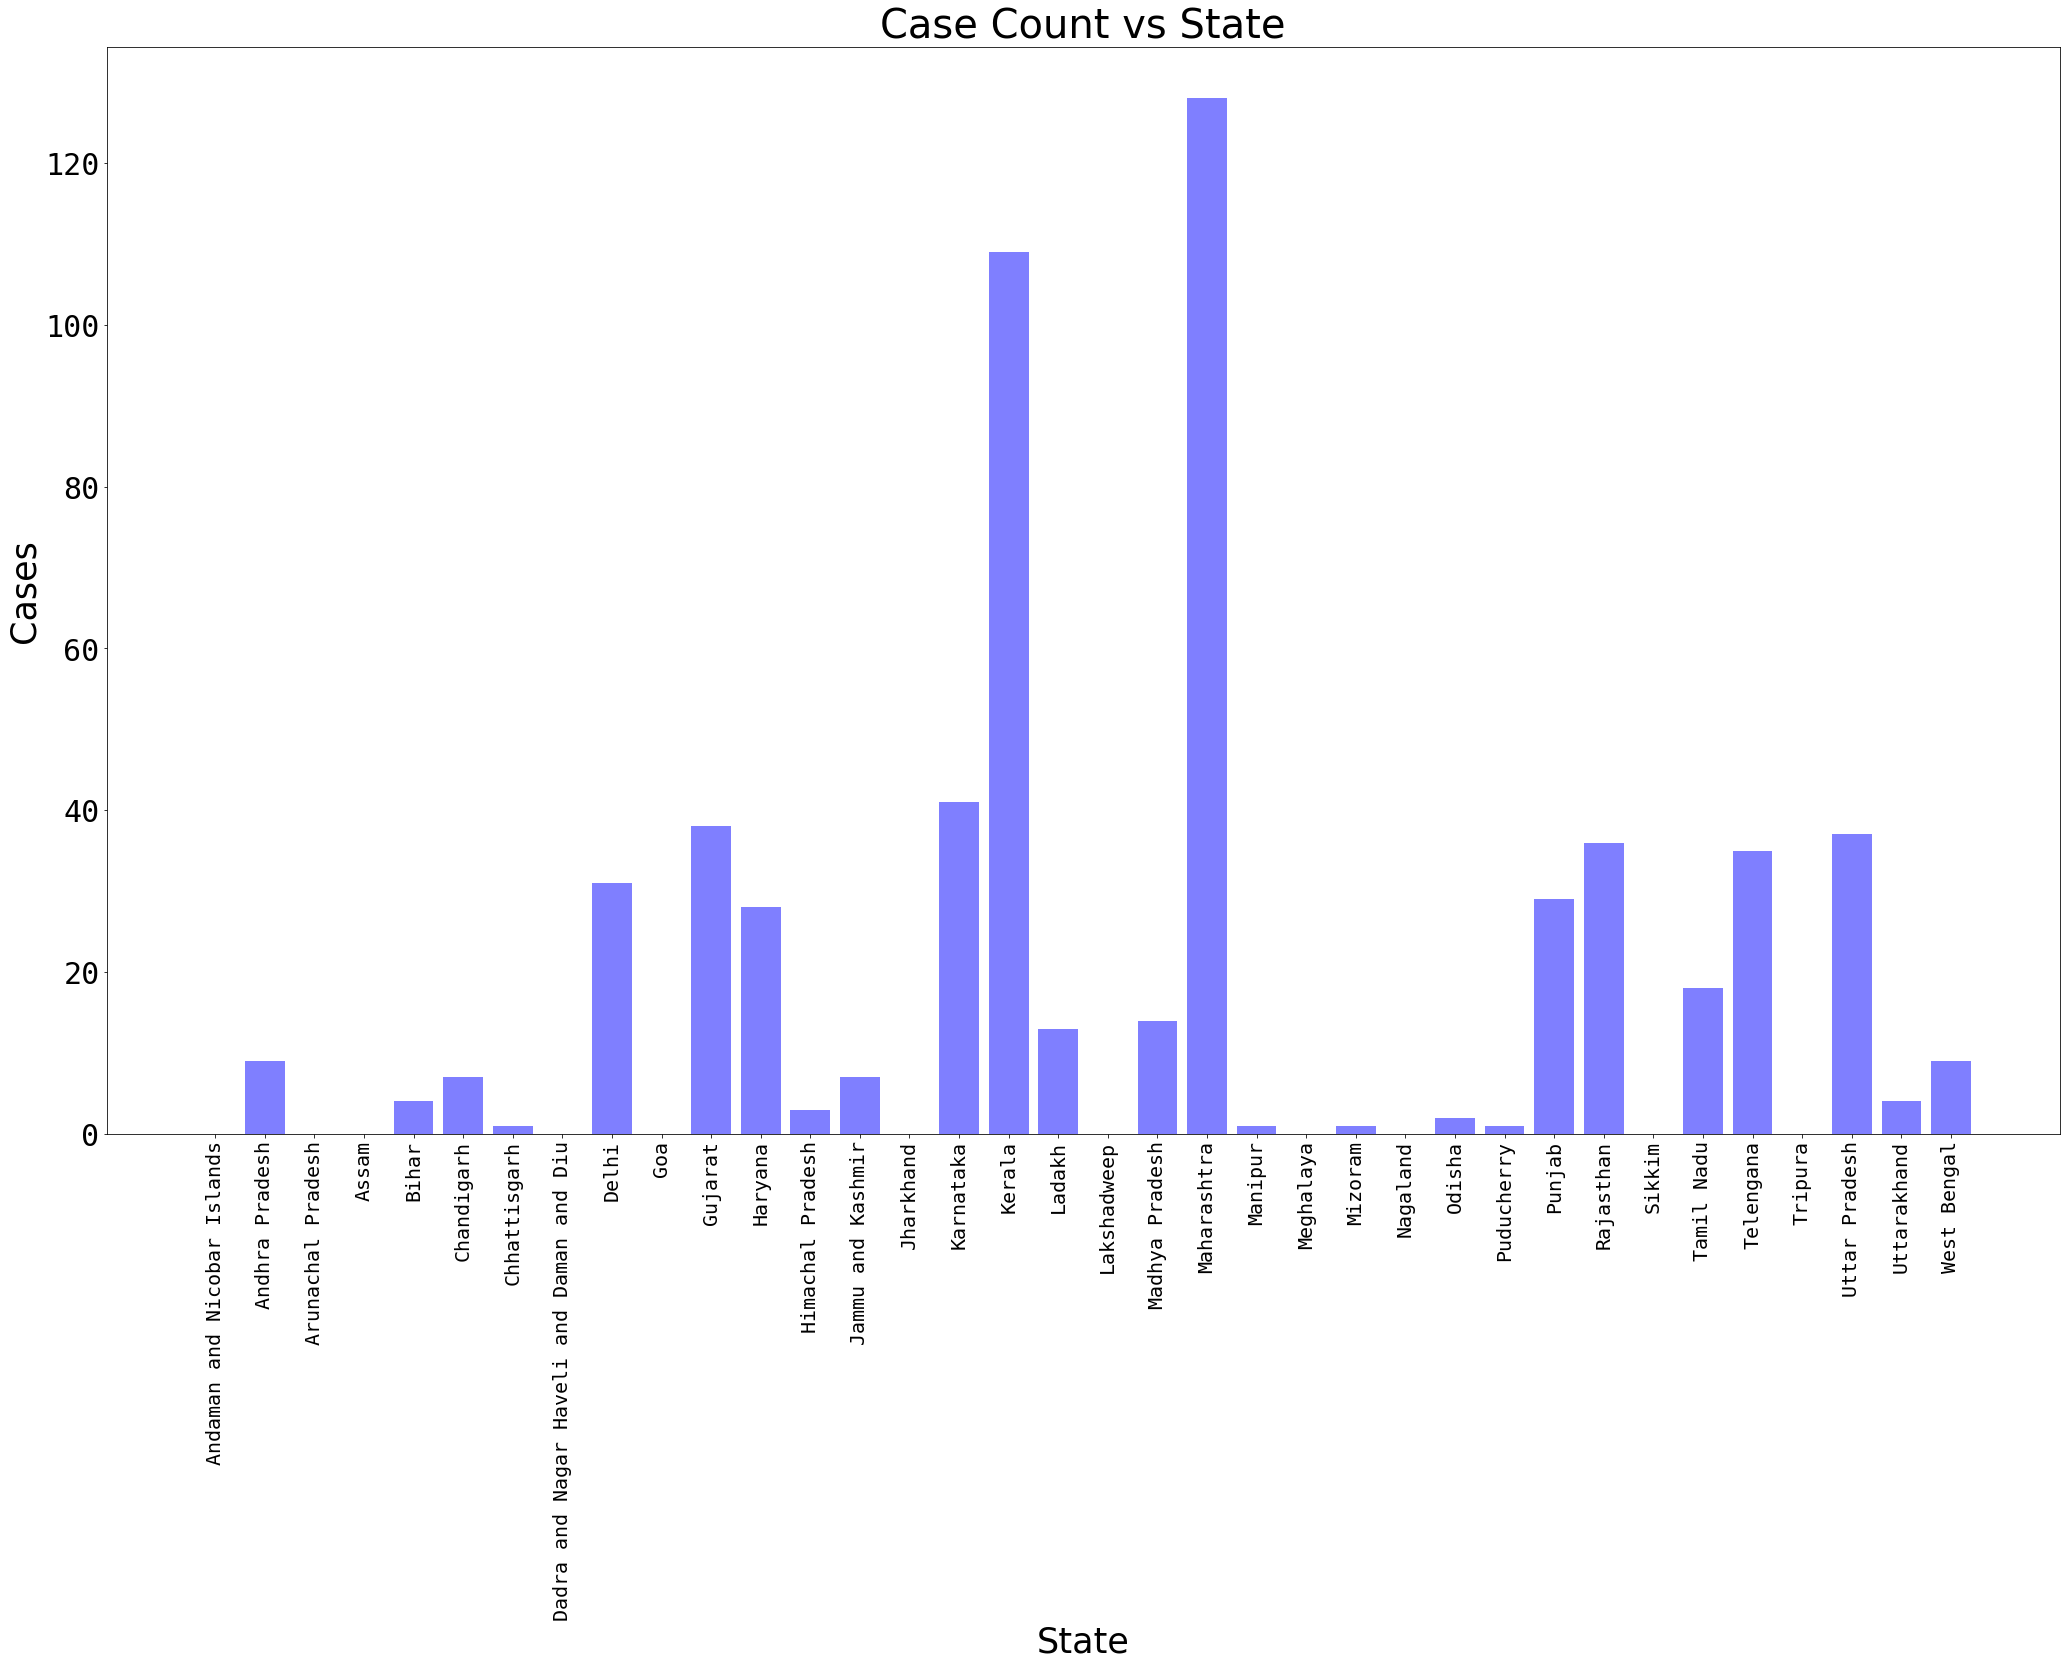

,State_Name,Confirmed
20,Maharashtra,128
16,Kerala,109
15,Karnataka,41
10,Gujarat,38
33,Uttar Pradesh,37


Top 5 most infected states:



In [ ]:
d5=df3.copy()
plt.figure(figsize=(35,20))
plt.bar(df3['State_Name'],df3['Confirmed'],align='center',alpha=0.5,color="Blue")
plt.title("Case Count vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace',rotation=90)
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d5.sort_values(["Confirmed"],axis=0,ascending=False,inplace=True)
print("Top 5 most infected states:\n")
d5[['State_Name','Confirmed']].head()

In [ ]:
import plotly.graph_objects as go
fig1=go.Figure(data=go.Scatterpolar(r=d5['Confirmed'].head(),theta=d5['State_Name'].head(),fill='toself'))
fig1.update_layout(polar=dict(radialaxis=dict(visible=True),),showlegend=False)
fig1.show()

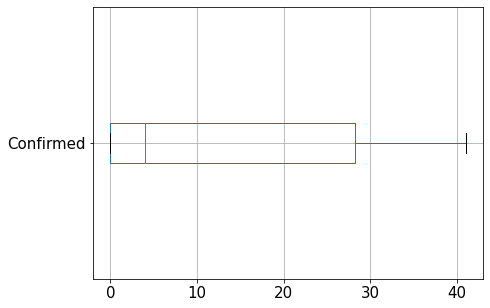

In [ ]:
# Boxplot for confirmed cases per state 
plt.figure(figsize=(7,5))
df3.boxplot(['Confirmed'],grid=True,fontsize=15,vert=False,showfliers=False)
plt.show()

<h2>2. Cured Rate's Plot</h2>

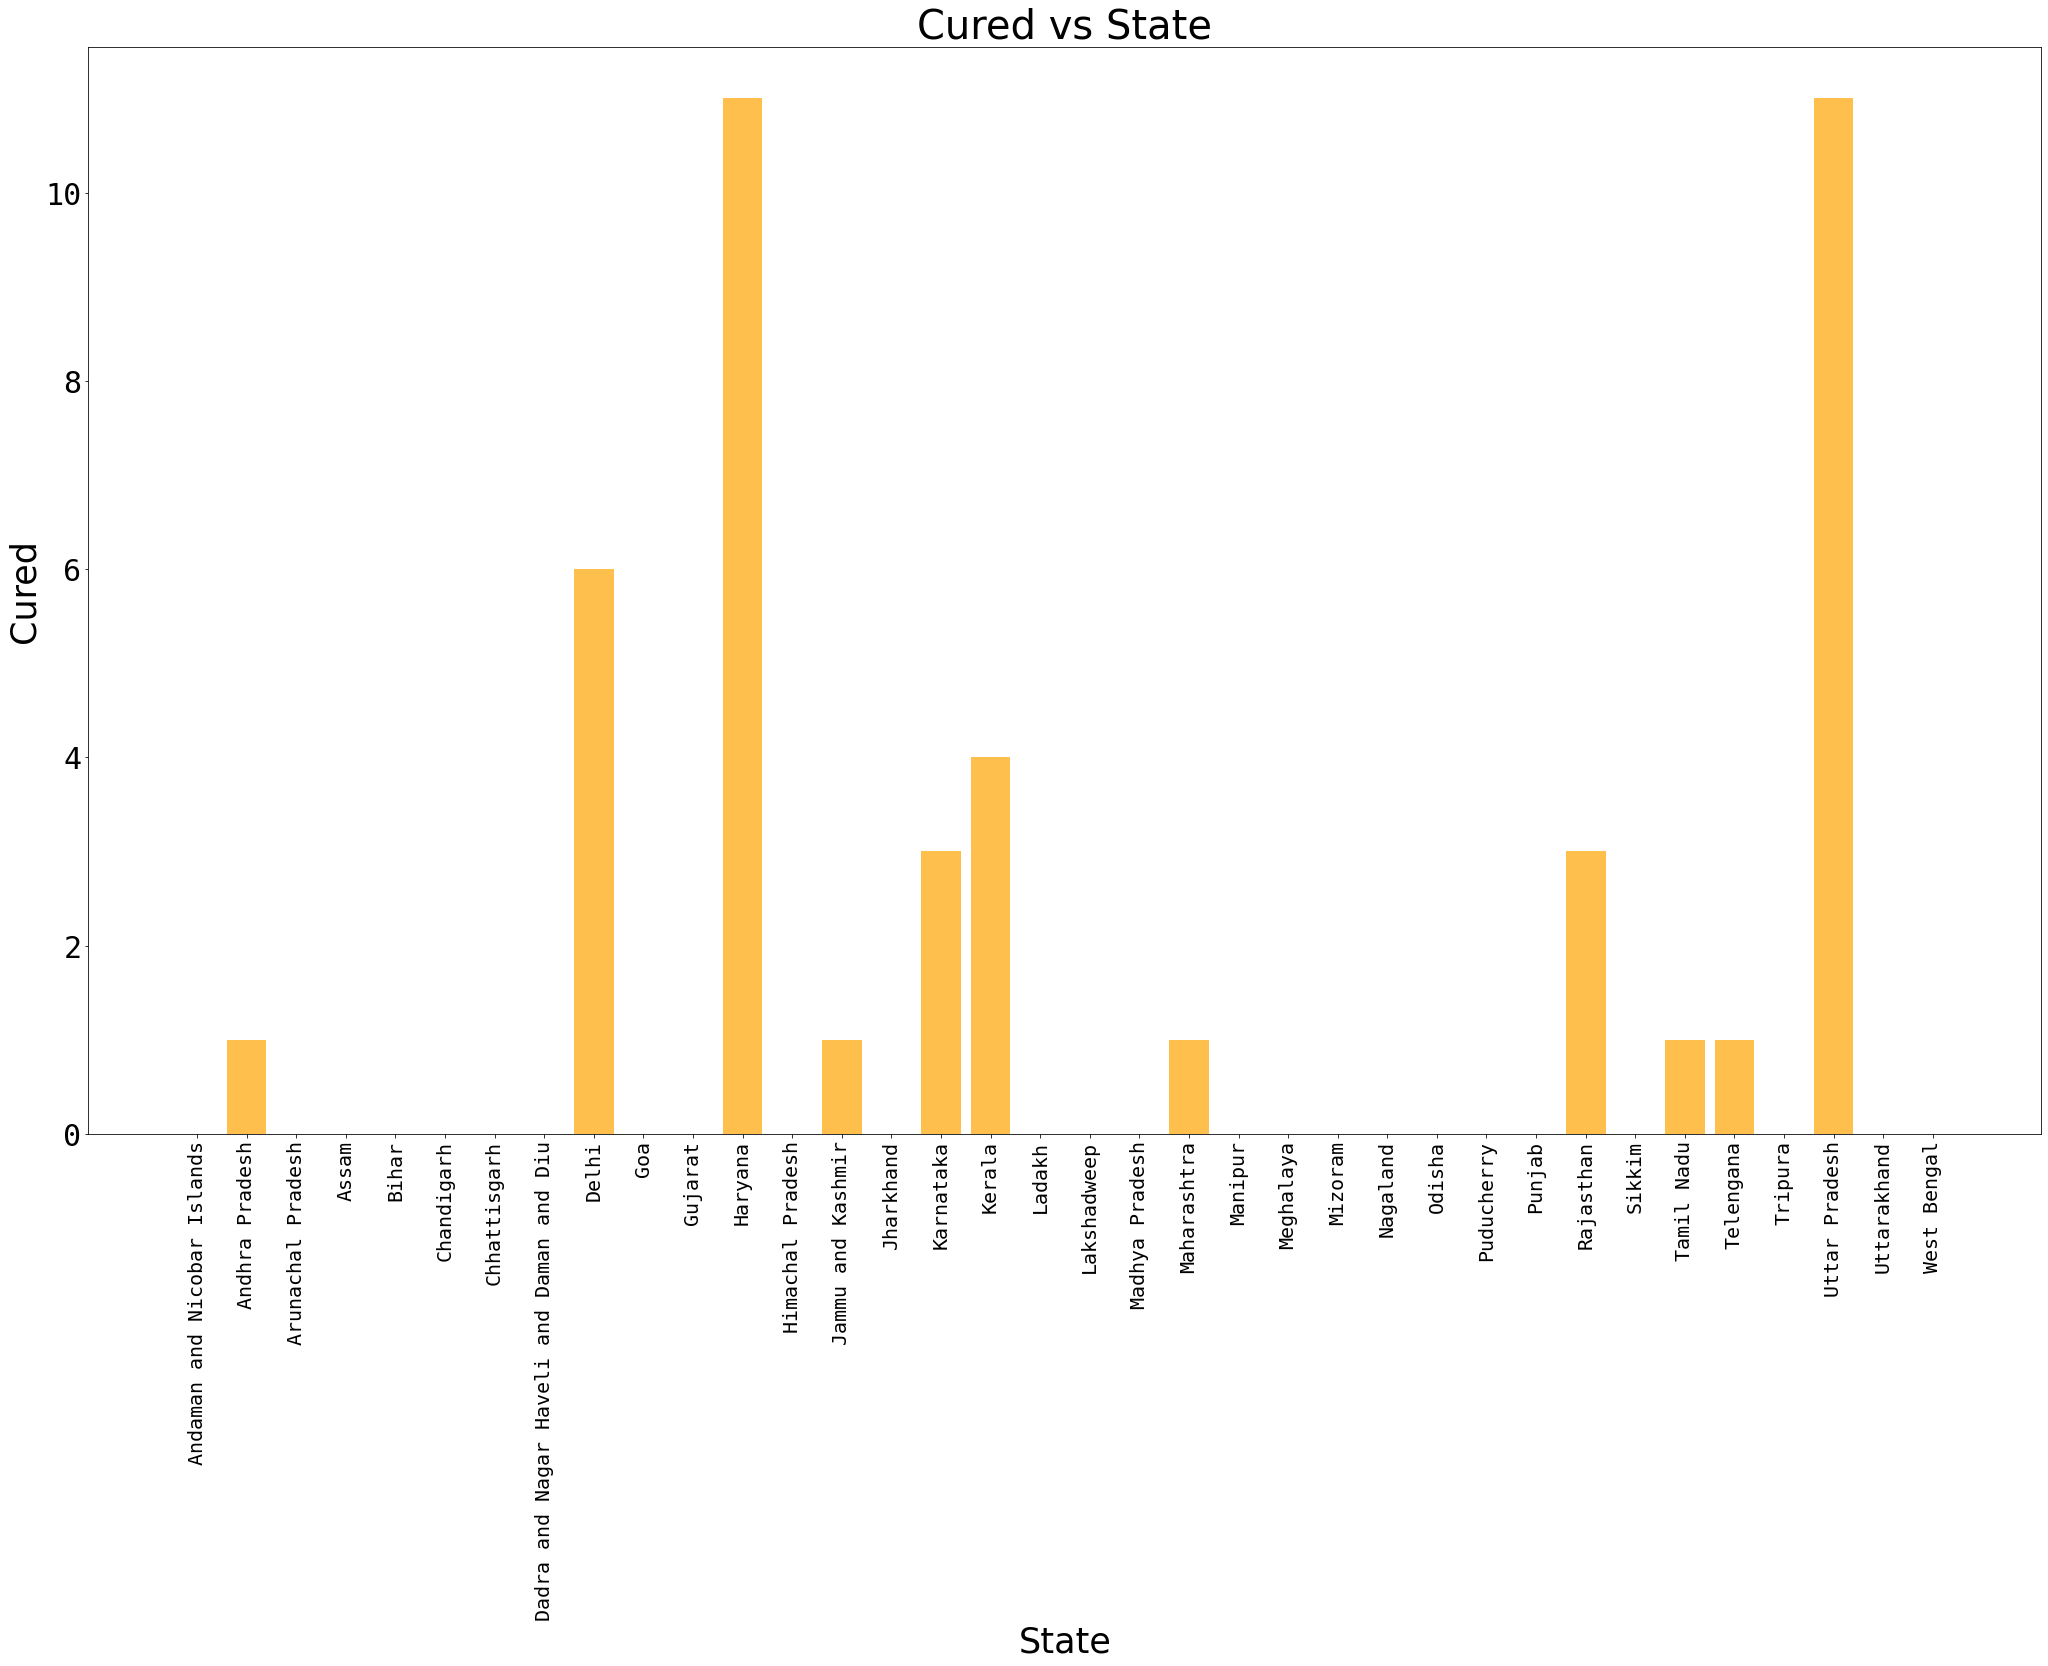

Top 5 states with most cured cases:



,State_Name,Cured
33,Uttar Pradesh,11
11,Haryana,11
8,Delhi,6
16,Kerala,4
28,Rajasthan,3


In [ ]:
d6=df3.copy()
plt.figure(figsize=(35,20))
plt.bar(df3['State_Name'],df3['Cured'],align='center',alpha=0.7,color="Orange")
plt.title("Cured vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace',rotation=90)
plt.ylabel("Cured",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d6.sort_values(["Cured"],axis=0,ascending=False,inplace=True)
print("Top 5 states with most cured cases:\n")
d6[['State_Name','Cured']].head()

<h2>3. Death Rate's Plot</h2>

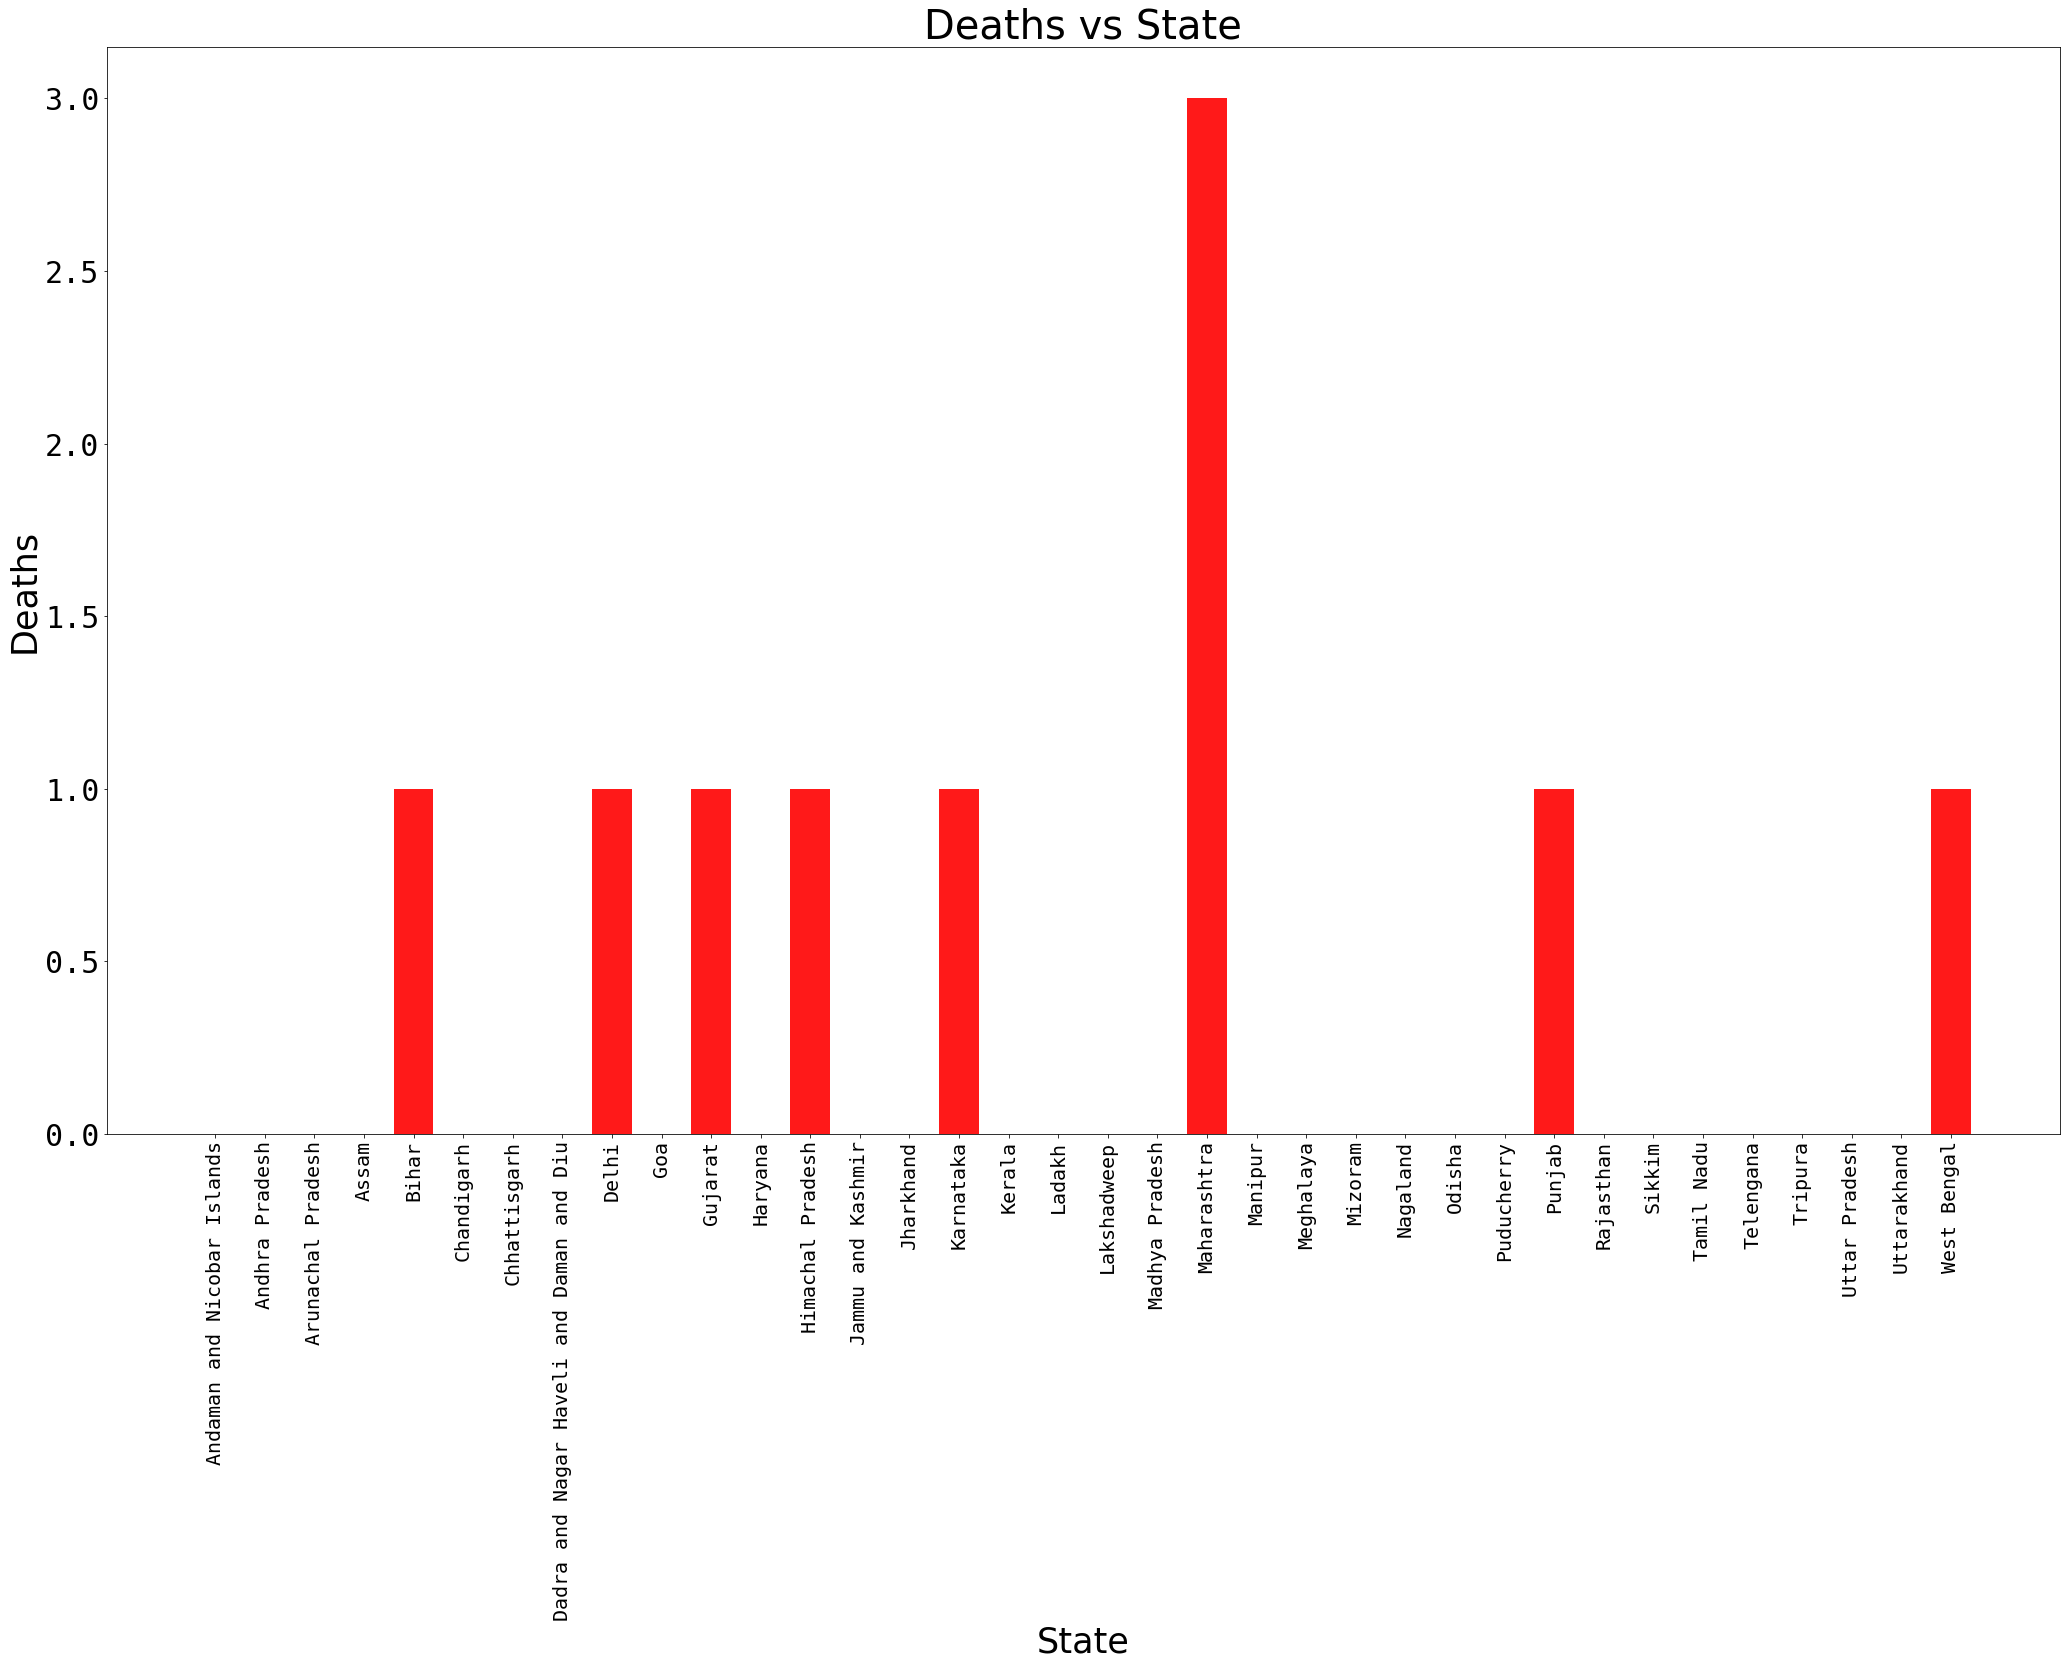

Top 5 states with most deaths:



,State_Name,Deaths
20,Maharashtra,3
8,Delhi,1
15,Karnataka,1
27,Punjab,1
12,Himachal Pradesh,1


In [ ]:
d7=df3.copy()
plt.figure(figsize=(35,20))
plt.bar(df3['State_Name'],df3['Deaths'],align='center',alpha=0.9,color="Red")
plt.title("Deaths vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(rotation=90,fontsize=20,fontname='monospace')
plt.ylabel("Deaths",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d7.sort_values(["Deaths"],axis=0,ascending=False,inplace=True)
print("Top 5 states with most deaths:\n")
d7[['State_Name','Deaths']].head()

<Figure size 504x360 with 0 Axes>

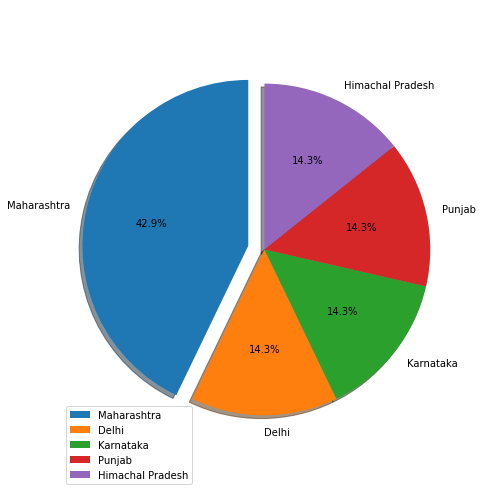

In [ ]:
# Pie chart depiction of deaths in top 5 states
plt.figure()
fig,ax=plt.subplots(figsize=(7,7))
plt.subplots_adjust(left=0.5,wspace=0.2)
ax.pie(d7['Deaths'].head(),explode=(0.1,0,0,0,0),labels=d7['State_Name'].head(),autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')
plt.legend(d7['State_Name'].head(),loc="best")
plt.tight_layout()
plt.show()

<h2>Overall Scenario using Map</h2>

In [ ]:
only_state=df3.copy()
only_state.drop([0,5,7,17,18,26,31],inplace=True)

In [ ]:
lat=[]
lng=[]
geolocator=Nominatim(user_agent='foursquare_api')
for nm in only_state['State_Name']:
    location=geolocator.geocode(str(nm),timeout=10)
    lat.append(location.latitude)
    lng.append(location.longitude)

In [ ]:
only_state['Latitude']=lat
only_state['Longitude']=lng

In [ ]:
wm=folium.Map(zoom_start=5,location=[only_state['Latitude'].mean(),only_state['Longitude'].mean()])
mp=folium.map.FeatureGroup()
for i,j,k,l,m in zip(only_state['Latitude'],only_state['Longitude'],only_state['Confirmed'],only_state['Cured'],only_state['Deaths']):
    mp.add_child(folium.CircleMarker(location=[i,j],radius=5,color='red',fill_color='Yellow'))
    folium.Marker([i,j],popup='Confirmed:'+str(k)+'\nCured:'+str(l)+"\nDeaths:"+str(m)).add_to(mp)
wm.add_child(mp)

wm

<h1>Population-wise Analysis</h1>

In [ ]:
pop=[]
for p in range(0,len(df_stateinfo)):
    pop.append(df_stateinfo['Population'][p][0])
df_pop=df3.copy()
df_pop['Population']=pop
df_pop.head()

,State_ID,Cured,Deaths,Confirmed,State_Name,Population
0,1,0,0,0,Andaman and Nicobar Islands,380581
1,2,1,0,9,Andhra Pradesh,49577103
2,3,0,0,0,Arunachal Pradesh,1383727
3,4,0,0,0,Assam,31205576
4,5,0,1,4,Bihar,104099452


<h2>Most populated states in India</h2>

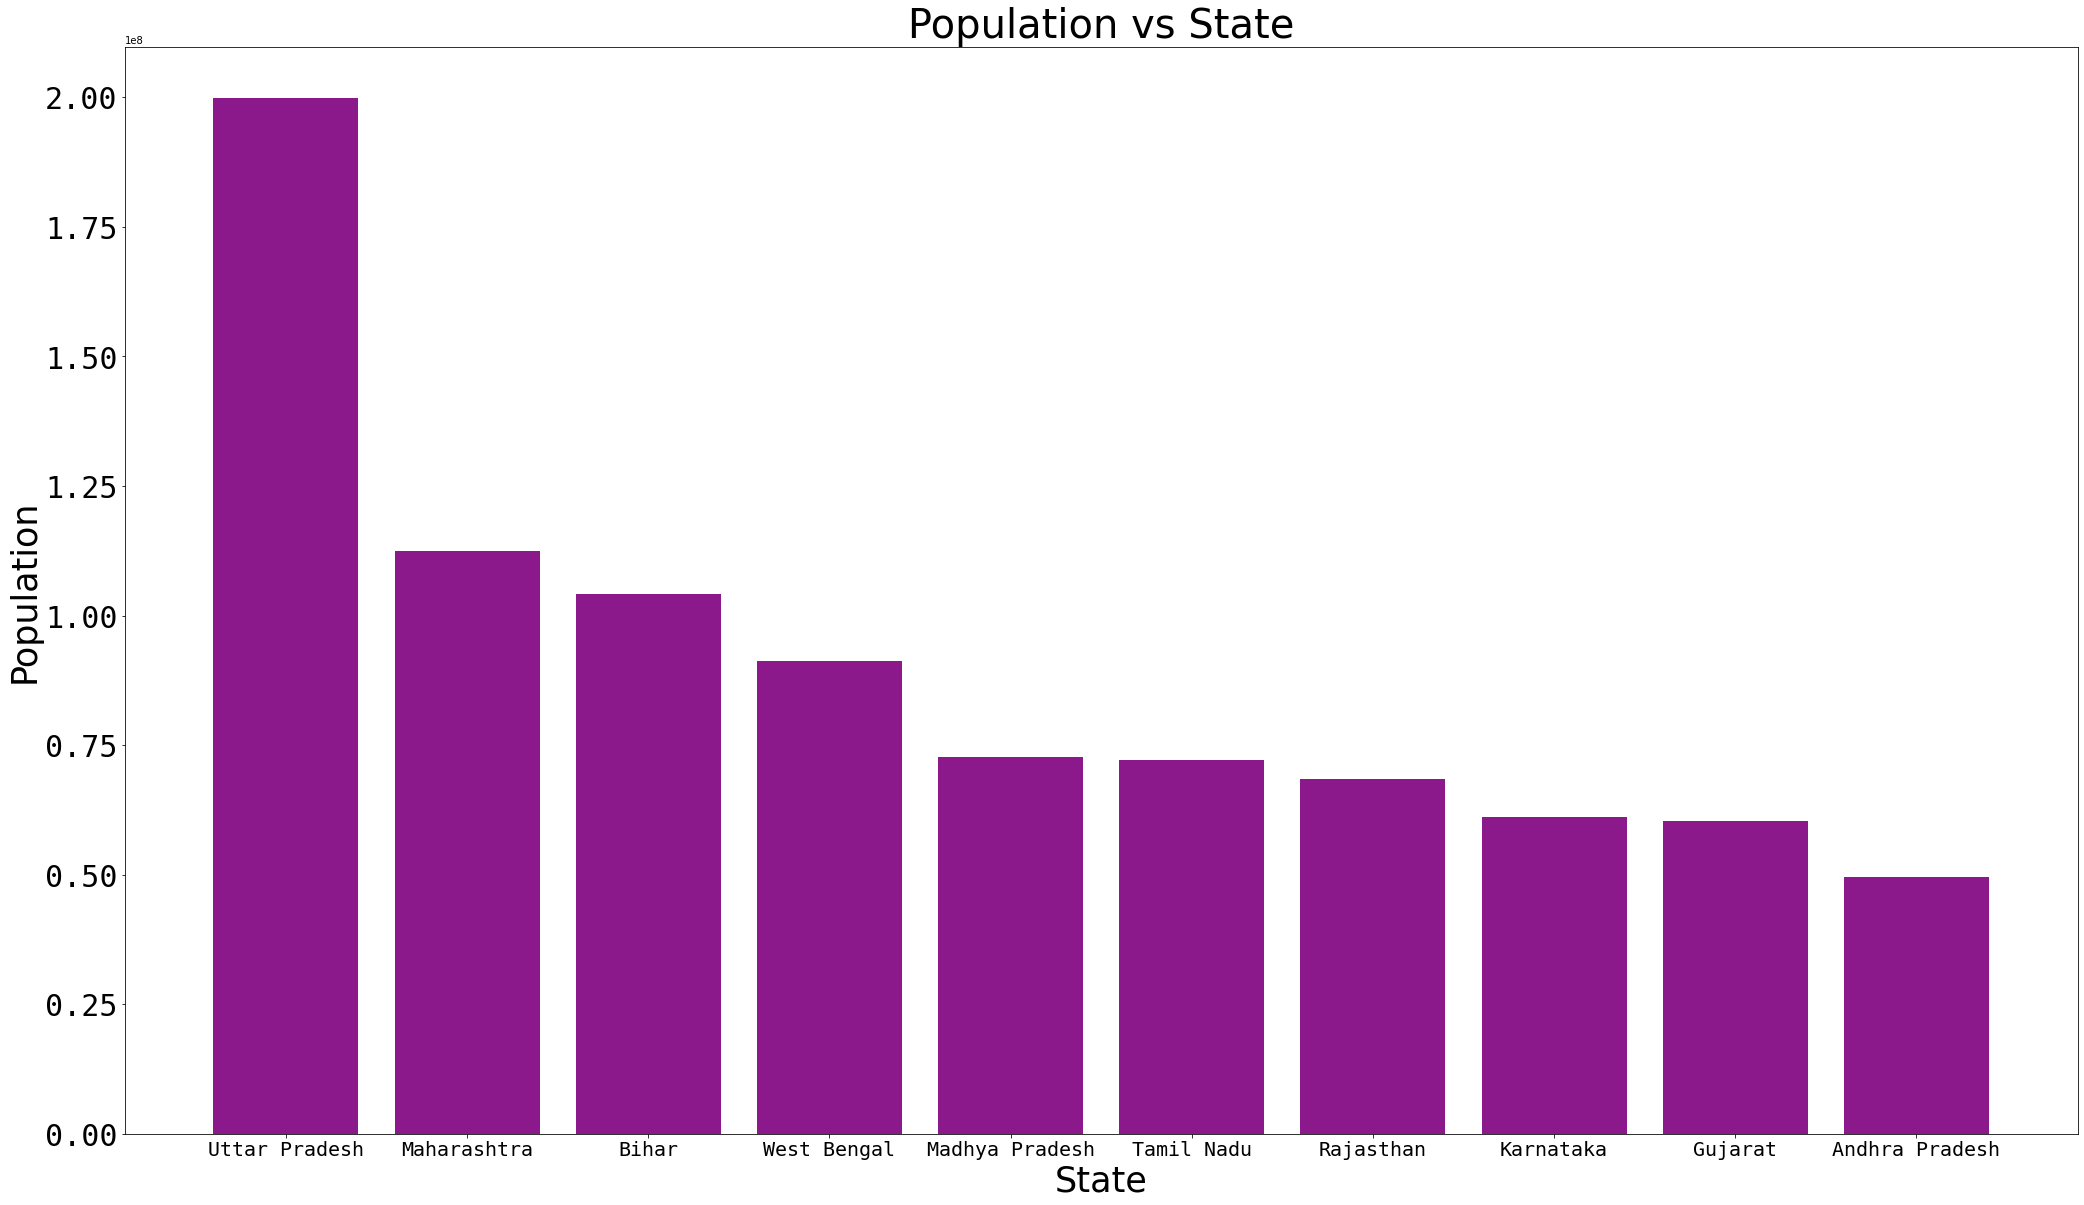

Top 5 most populated states:


,State_Name,Population
33,Uttar Pradesh,199812341
20,Maharashtra,112374333
4,Bihar,104099452
35,West Bengal,91276115
19,Madhya Pradesh,72626809


In [ ]:
most=df_pop.copy()
most.sort_values(["Population"],axis=0,ascending=False,inplace=True)
plt.figure(figsize=(35,20))
plt.bar(most['State_Name'].head(10),most['Population'].head(10),align='center',alpha=0.9,color="purple")
plt.title("Population vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Population",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
print("Top 5 most populated states:")
most[['State_Name','Population']].head()

In [ ]:
most['Confirmed %']=round((most['Confirmed']/most['Population'])*100,9)
most['Cured %']=round(most['Cured']/most['Population']*100,9)
most['Death %']=round(most['Deaths']/most['Population']*100,9)
most.head()

,State_ID,Cured,Deaths,Confirmed,State_Name,Population,Confirmed %,Cured %,Death %
33,34,11,0,37,Uttar Pradesh,199812341,0.000019,5.505000e-06,0.000000e+00
20,21,1,3,128,Maharashtra,112374333,0.000114,8.900000e-07,2.670000e-06
4,5,0,1,4,Bihar,104099452,0.000004,0.000000e+00,9.610000e-07
35,36,0,1,9,West Bengal,91276115,0.000010,0.000000e+00,1.096000e-06
19,20,0,0,14,Madhya Pradesh,72626809,0.000019,0.000000e+00,0.000000e+00


<h3>1. Population Vs Confirmed</h3>

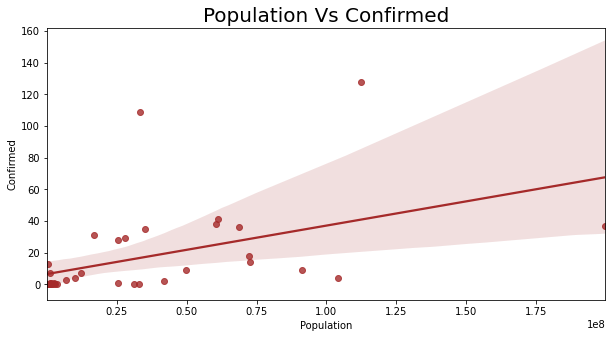

States with most affected population: 


,State_Name,Confirmed,Confirmed %
17,Ladakh,13,0.004745
5,Chandigarh,7,0.000663
16,Kerala,109,0.000326
8,Delhi,31,0.000185
20,Maharashtra,128,0.000114


In [ ]:
# Relation between Population and Confirmed
most1=most.copy()
plt.figure(1,figsize=(10,5))
sns.regplot(most1['Population'],most1['Confirmed'],color='brown')
plt.title('Population Vs Confirmed',size=20)
plt.show()
most1.sort_values(["Confirmed %"],axis=0,ascending=False,inplace=True)
print("States with most affected population: ")
most1[['State_Name','Confirmed','Confirmed %']].head()

<h3>2. Population Vs Cured</h3>

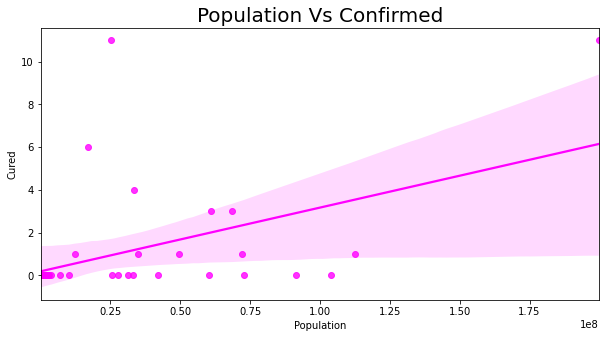

States with most cured population: 


,State_Name,Cured,Cured %
11,Haryana,11,0.000043
8,Delhi,6,0.000036
16,Kerala,4,0.000012
13,Jammu and Kashmir,1,0.000008
33,Uttar Pradesh,11,0.000006


In [ ]:
# Relation between Population and Cured
most2=most.copy()
plt.figure(1,figsize=(10,5))
sns.regplot(most2['Population'],most2['Cured'],color='magenta')
plt.title('Population Vs Confirmed',size=20)
plt.show()
most2.sort_values(["Cured %"],axis=0,ascending=False,inplace=True)
print("States with most cured population: ")
most2[['State_Name','Cured','Cured %']].head()

<h3>3. Population Vs Deaths</h3>

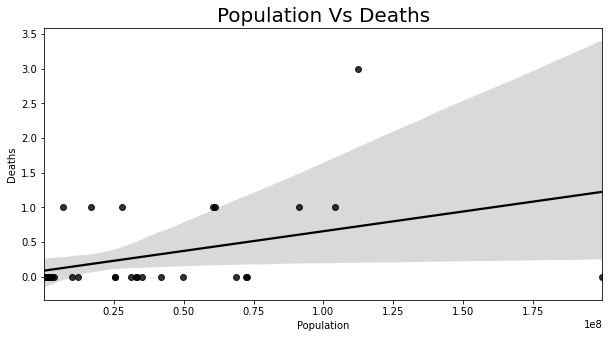

States with most deaths: 


,State_Name,Deaths,Death %
12,Himachal Pradesh,1,0.000015
8,Delhi,1,0.000006
27,Punjab,1,0.000004
20,Maharashtra,3,0.000003
10,Gujarat,1,0.000002


In [ ]:
# Relation between Population and Deaths
most3=most.copy()
plt.figure(1,figsize=(10,5))
sns.regplot(most3['Population'],most3['Deaths'],color='black')
plt.title('Population Vs Deaths',size=20)
plt.show()
most3.sort_values(["Death %"],axis=0,ascending=False,inplace=True)
print("States with most deaths: ")
most3[['State_Name','Deaths','Death %']].head()

<h2>Age-Wise Analysis</h2>

<p>This data is of starting 60 days, i.e., till 28-03-2020.</p>

In [ ]:
age=pd.read_csv('https://raw.githubusercontent.com/DivyT-03/Project/master/AgeGroupDetails.csv')
age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


<h4>Cleaning Data</h4>

In [ ]:
age.drop([9],inplace=True)

<h2>Visualization</h2>

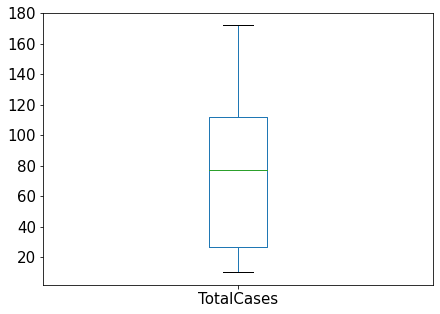

In [ ]:
# Boxplot for cases per age-group 
plt.figure(figsize=(7,5))
age.boxplot(['TotalCases'],grid=False,fontsize=15)
plt.show()

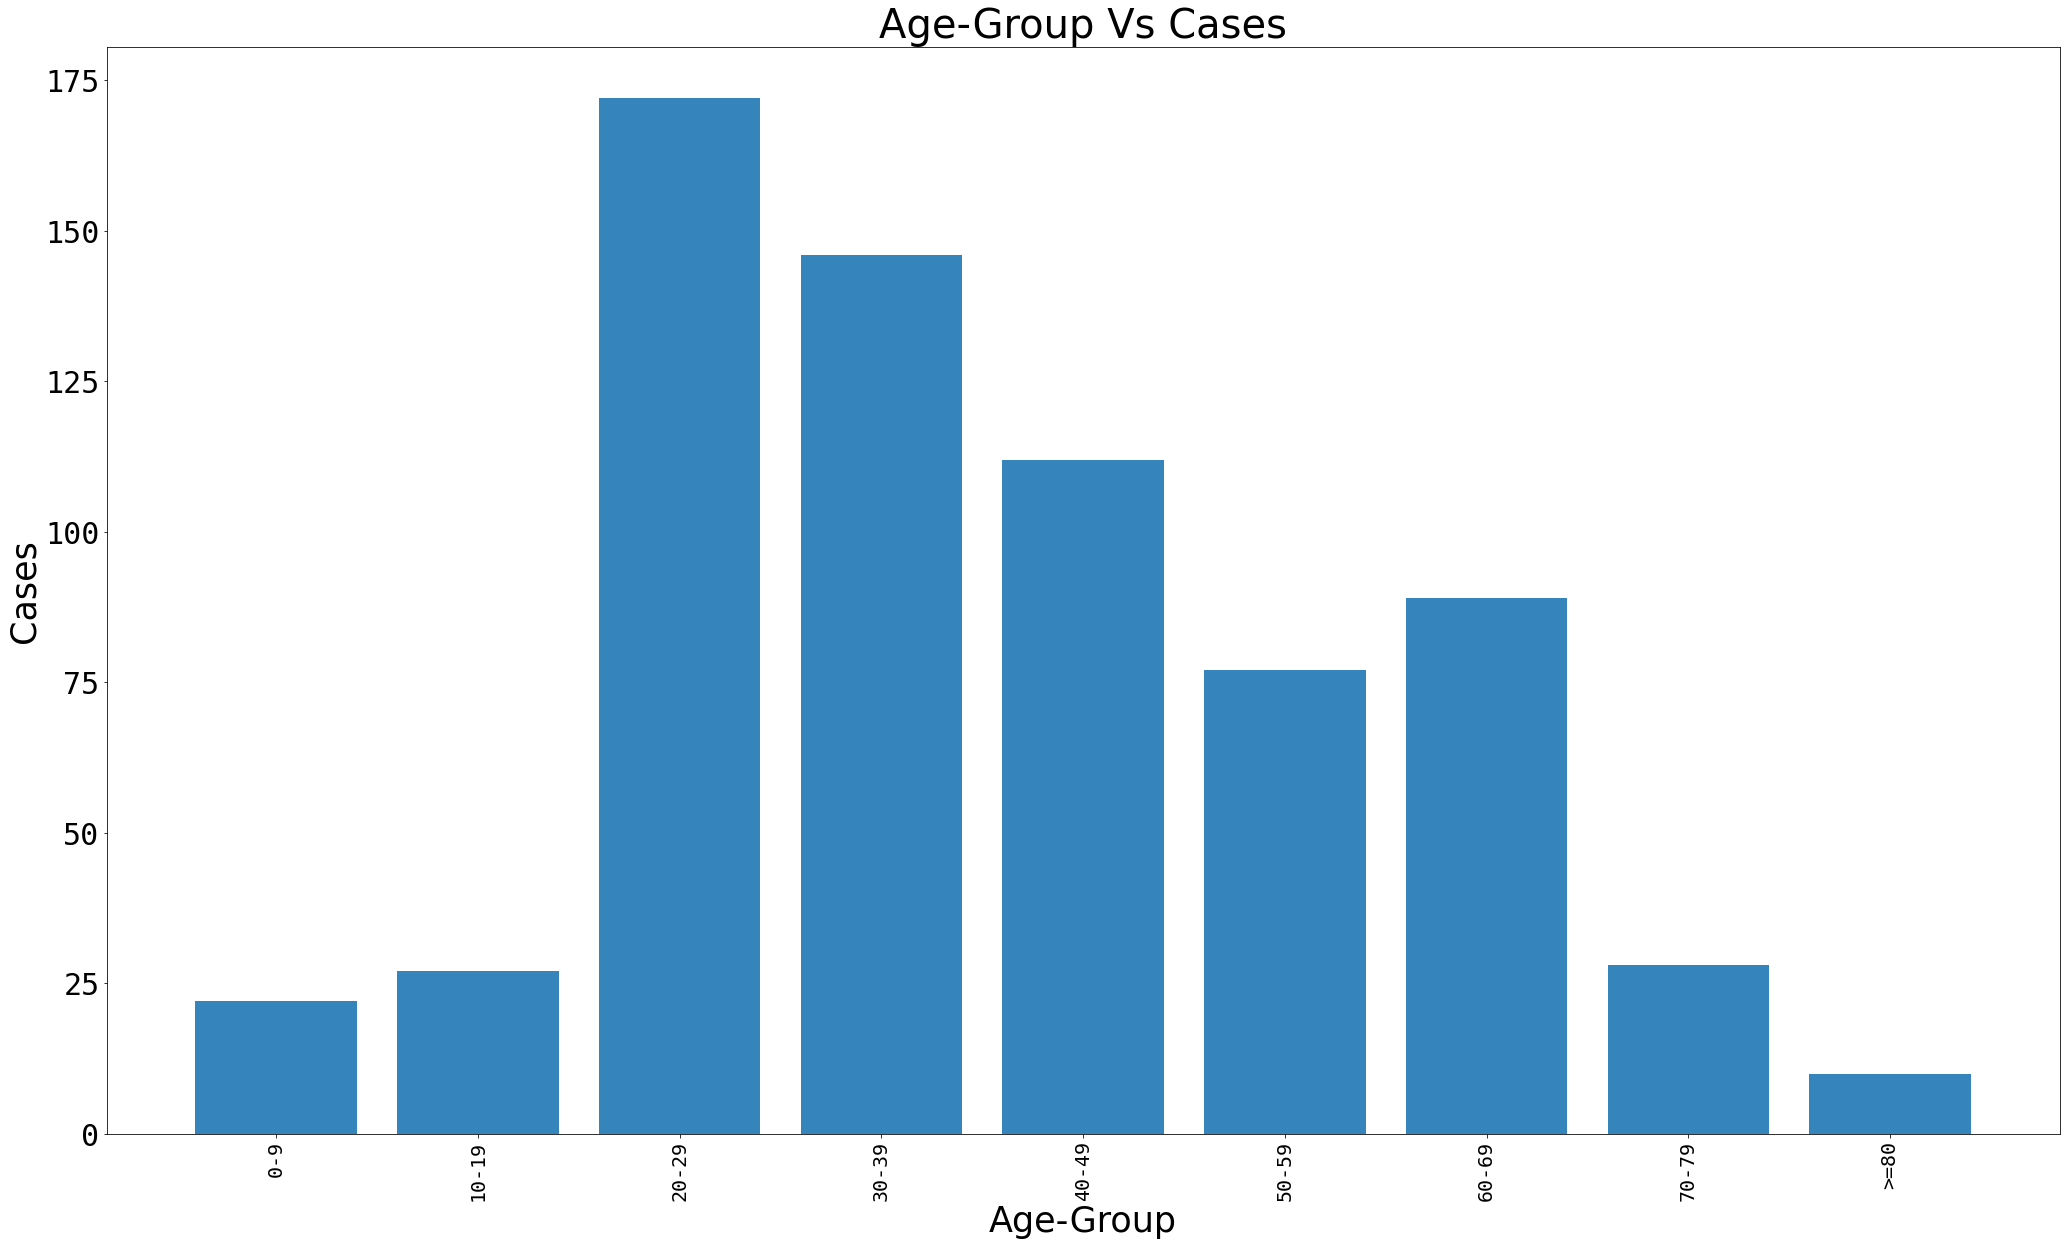

Mostly affected age-groups are:


,TotalCases,Percentage
AgeGroup,,
20-29,172,24.86%
30-39,146,21.10%


In [ ]:
plt.figure(figsize=(35,20))
plt.bar(age['AgeGroup'],age['TotalCases'],align='center',alpha=0.9)
plt.title("Age-Group Vs Cases",size=40)
plt.xlabel("Age-Group",size=35)
plt.xticks(fontsize=20,fontname='monospace',rotation=90)
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
age1=age.copy()
age1.sort_values(["TotalCases"],axis=0,ascending=False,inplace=True)
age1.drop(columns={'Sno'},inplace=True)
age1.set_index(['AgeGroup'],inplace=True)
print("Mostly affected age-groups are:")
age1.head(2)

<p></p>
<p></p>

<h1>Data Modelling</h1>

<p>As per the plots we obtained above, we intent to use the exponential regression model to predict the infected, cured and death rates.</p>   

<h2>Regression</h2>

<h3>Day-Wise Prediction</h3>

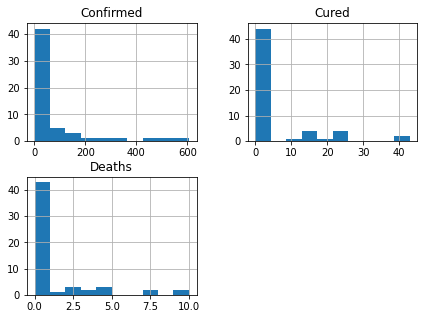

In [ ]:
df2.hist(['Confirmed','Cured','Deaths'])
plt.show()

<h3>Creating Training/Testing Datasets</h3>

In [ ]:
import numpy as np
msk=np.random.rand(len(df2))<.75
train=df2[msk]
test=df2[~msk]

<h3>Transforming Data</h3>

In [ ]:
train_x=train['Day'].values
test_x=test['Day'].values
train_y1=train['Confirmed'].values
test_y1=test['Confirmed'].values
train_y2=train['Cured'].values
test_y2=test['Cured'].values
train_y3=train['Deaths'].values
test_y3=test['Deaths'].values

<h3>Defining the exponential function</h3>

In [ ]:
def sigmoid(x,a,b):
    y=a*np.exp(b*x)
    return y

<h3>Finding optimized parameters</h3>

In [ ]:
'''This function has a particular limit, hence we find the best parameters only limited number of times. Hence this code is a comment'''
from scipy.optimize import curve_fit
#popt1,pcov1=curve_fit(sigmoid,train_x,train_y1)
#popt2,pcov2=curve_fit(sigmoid,train_x,train_y2)
popt3,pcov3=curve_fit(sigmoid,train_x,train_y3)

In [ ]:
a1=0.024636474551803556
b1=0.1806252301712788
a2=0.006491019205331347
b2=0.15694857422845598
a3=-8.509657270186663e-16
b3=0.9999999967317126   
print("Optimized parameters are:")
print("\nFor Confirmed:")
print("a:",a1)
print("b:",b1)
print("\nFor Cured:")
print("a:",a2)
print("b:",b2)
print("\nFor Deaths:")
print("a:",popt3[0])
print("b:",popt3[1])

Optimized parameters are:

For Confirmed:
a: 0.024636474551803556
b: 0.1806252301712788

For Cured:
a: 0.006491019205331347
b: 0.15694857422845598

For Deaths:
a: -2.0205601650386332e-14
b: 0.9999999960609309


<h3>Prediction</h3>

In [ ]:
pred1=sigmoid(test_x,a1,b1)
pred2=sigmoid(test_x,a2,b2)
pred3=sigmoid(test_x,popt3[0],popt3[1])

<h3>Comparing Predicted and Actual Values</h3>

<h3>1. Confirmed Cases</h3>

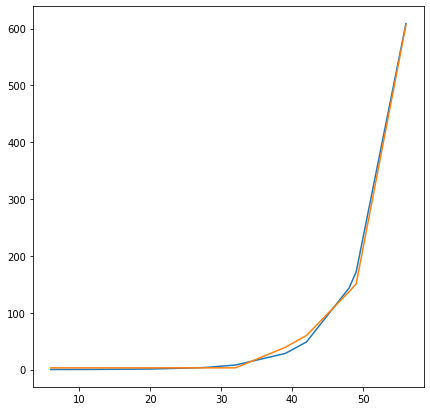

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(test_x,pred1)
plt.plot(test_x,test_y1)
plt.show()

<h3>Predicted values</h3>

In [ ]:
pred1

array([7.28191836e-02, 2.15235077e-01, 9.12997054e-01, 3.23281730e+00,
       3.87280564e+00, 7.97634381e+00, 2.82433137e+01, 4.85567122e+01,
       1.43521352e+02, 1.71933719e+02, 6.08797476e+02])

<h3>Evaluation</h3>

In [ ]:
from sklearn.metrics import r2_score
r1=r2_score(pred1,test_y1)
rss1=round(np.mean((pred1-test['Confirmed'])**2),3)
mae1=round(np.mean(np.absolute(pred1-test['Confirmed'])),3)
print("For Confirmed:\n")
print("R-2 Score:",round(r1*100,2),'%')
print("Residual Sum of Squares:",rss1)
print("Mean Absolute Error:",mae1)

For Confirmed:

R-2 Score: 99.76 %
Residual Sum of Squares: 71.044
Mean Absolute Error: 6.03


<h3>2. For Cured Cases</h3>

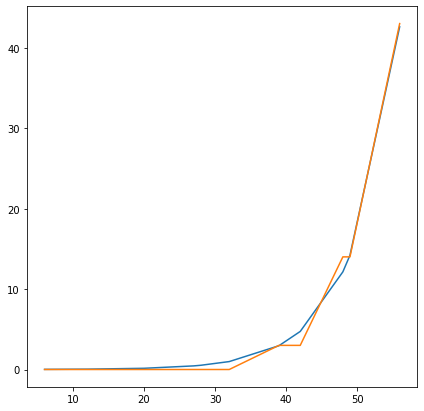

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(test_x,pred2)
plt.plot(test_x,test_y2)
plt.show()

<h3>Predicted values</h3>

In [ ]:
pred2

array([1.66450189e-02, 4.26830741e-02, 1.49813479e-01, 4.49452900e-01,
       5.25830880e-01, 9.85130319e-01, 2.95547291e+00, 4.73274039e+00,
       1.21362379e+01, 1.41986149e+01, 4.25970260e+01])

<h3>Evaluation</h3>

In [ ]:
r2=r2_score(pred2,test_y2)
rss2=round(np.mean((pred2-test['Cured'])**2),3)
mae2=round(np.mean(np.absolute(pred2-test['Cured'])),3)
print("For Cured:\n")
print("R-2 Score:",round(r2*100,2),'%')
print("Residual Sum of Squares:",rss2)
print("Mean Absolute Error:",mae2)

For Cured:

R-2 Score: 99.5 %
Residual Sum of Squares: 0.741
Mean Absolute Error: 0.583


<h3>3. For Deaths</h3>

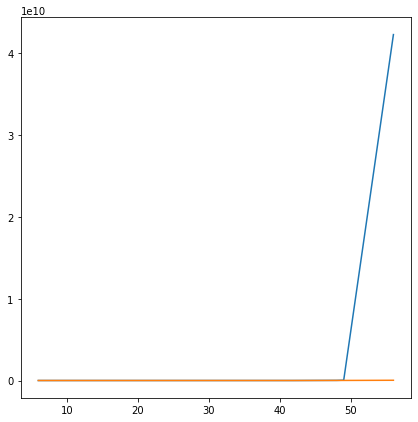

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(test_x,pred3*(-1))
plt.plot(test_x,test_y3*(2900000))
plt.show()

<h3>Predicted Values</h3>

In [ ]:
pred3*(-2900000)

array([2.36394118e-05, 9.53681915e-03, 2.84288563e+01, 3.11760256e+04,
       8.47452236e+04, 4.62693236e+06, 5.07404731e+09, 1.01914963e+11,
       4.11154297e+13, 1.11763325e+14, 1.22563365e+17])

<h3>Evaluation</h3>

In [ ]:
r3=r2_score(pred3,test_y3*(-2900000))
rss3=round(np.mean((pred3-test['Deaths'])**2),3)
mae3=round(np.mean(np.absolute(pred3-test['Deaths'])),3)
print("For Deaths:\n")
print("R-2 Score:",round(r3*100,2),'%')
print("Residual Sum of Squares:",rss3)
print("Mean Absolute Error:",mae3)

For Deaths:

R-2 Score: -9.88 %
Residual Sum of Squares: 1.623802030064905e+20
Mean Absolute Error: 3846907542.212


<h3>Summary</h3>

In [ ]:
summ={'Factor':['Confirmed','Cured','Deaths'],'R2 %':[round(r1*100,2),round(r2*100,2),round(r3*100,2)]}
rep=pd.DataFrame(summ)
rep.set_index(['Factor','R2 %'],inplace=True)
rep

,
Factor,R2 %
Confirmed,99.76
Cured,99.50
Deaths,-9.88


<p></p>
<p></p>
<p>We will be continuing to predict the confirmed cases post lock-down and see the results.</p>
<p></p>
<p></p>

<h1>Predicting cases after lock-down (till 108 days)</h1>

<p>Since we got a good percentage of confirmed and cured rates, we will be predicting cases only for these two factors.</p>

<h2>1. Confirmed Cases</h2>

In [ ]:
post_ld=[]
for x in range(57,109):
        post_ld.append(int(sigmoid(x,a1,b1)))

In [ ]:
df_cv2=df_cv[df_cv['Day']>=57]
df_cv2.drop(columns={'State_ID'},inplace=True)
df_cv2=df_cv2.groupby(['Day']).sum()
df_cv2.reset_index(inplace=True)
df_preds=df_cv2[['Day','Confirmed']]
df_preds['Predicted']=post_ld
df_preds.head()

,Day,Confirmed,Predicted
0,57,694,729
1,58,724,873
2,59,909,1046
3,60,1024,1253
4,61,1205,1502


<h2>Visual Comparison</h2>

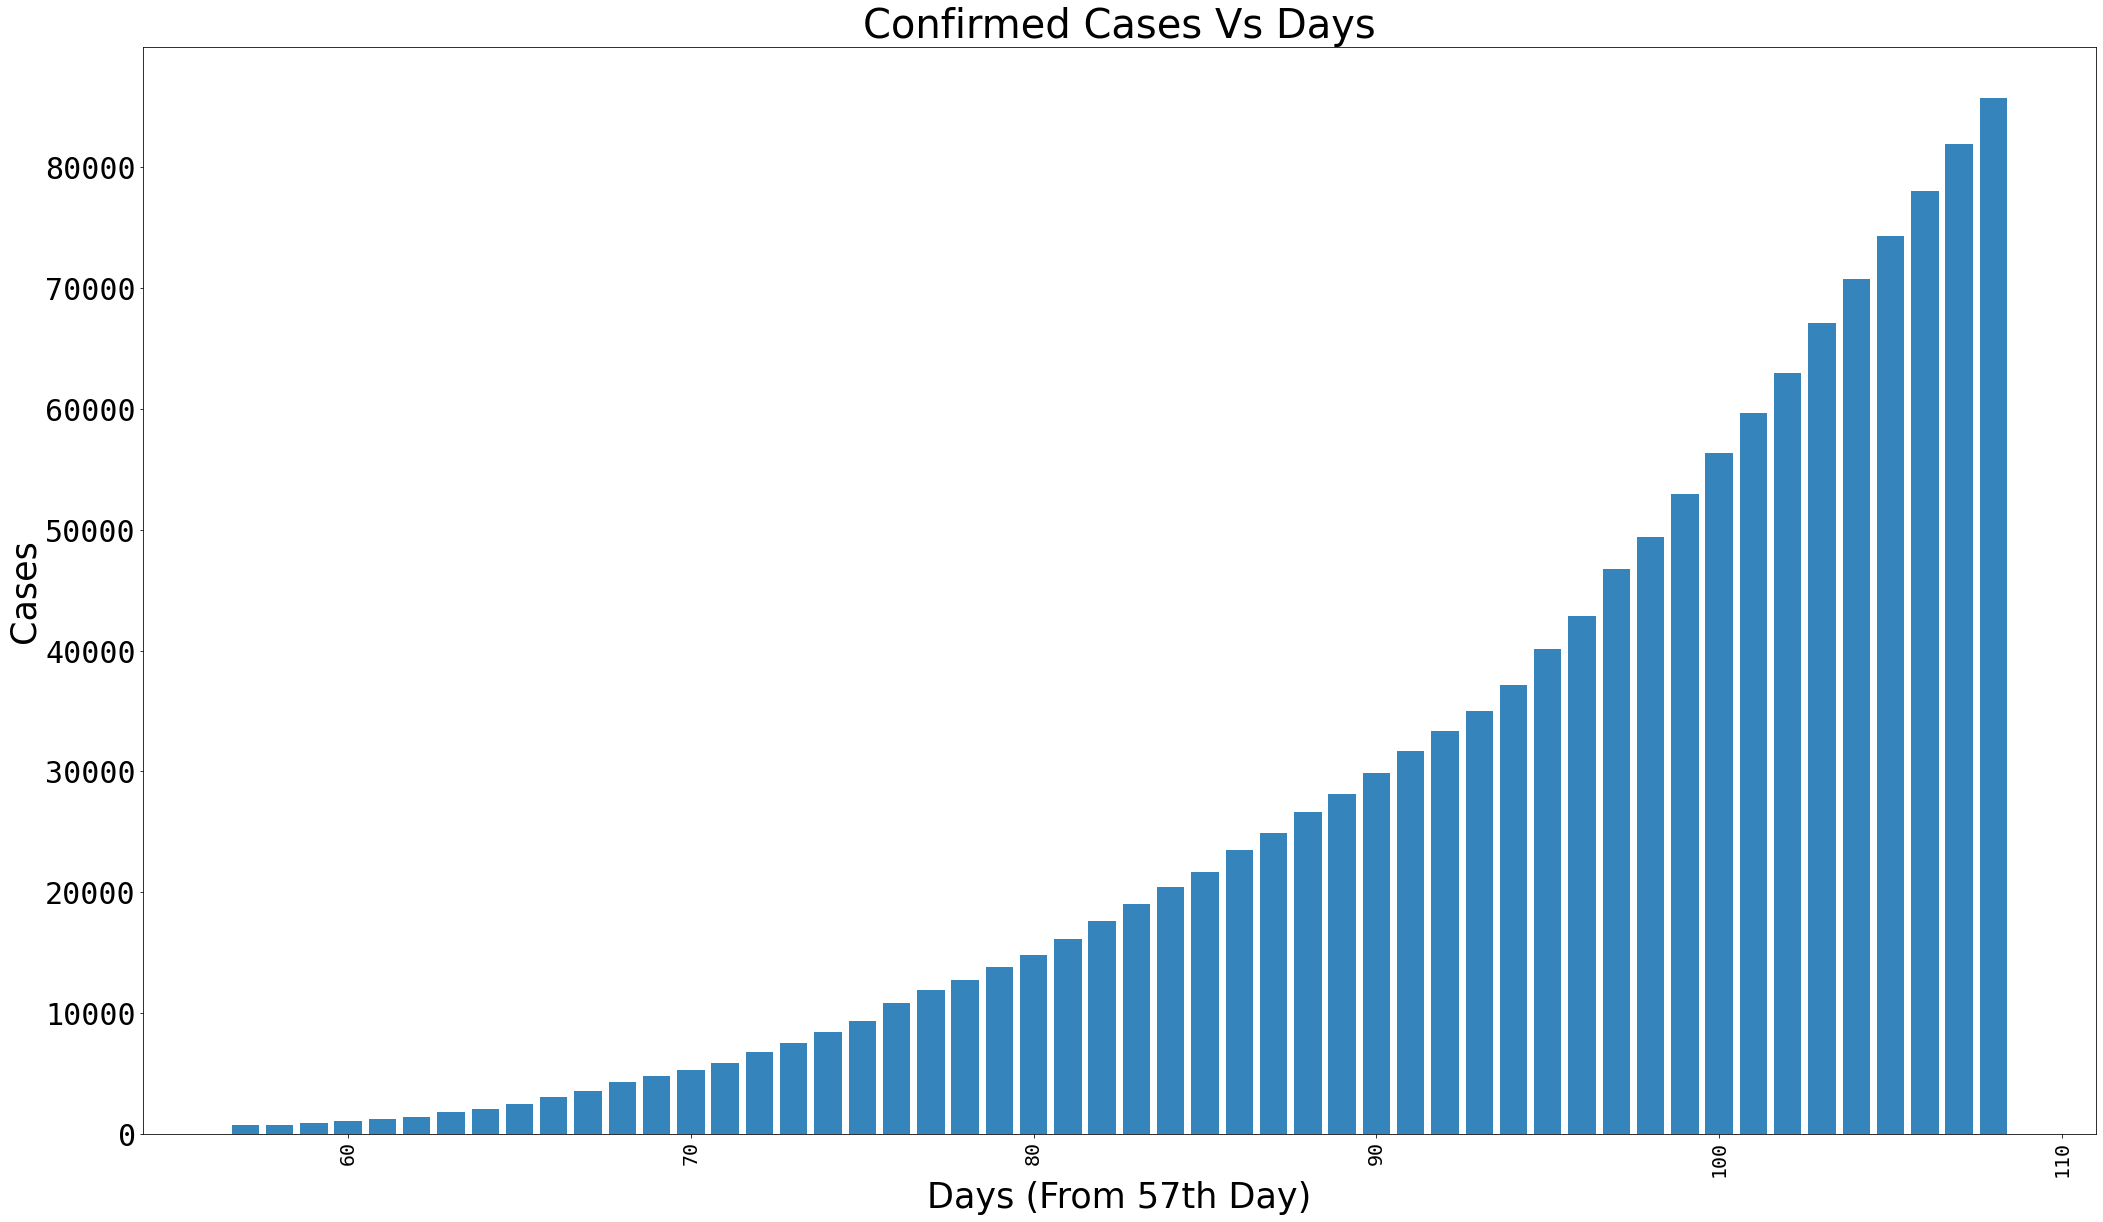

In [ ]:
plt.figure(figsize=(35,20))
plt.bar(df_preds['Day'],df_preds['Confirmed'],align='center',alpha=0.9)
plt.title("Confirmed Cases Vs Days",size=40)
plt.xlabel("Days (From 57th Day)",size=35)
plt.xticks(fontsize=20,fontname='monospace',rotation=90)
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

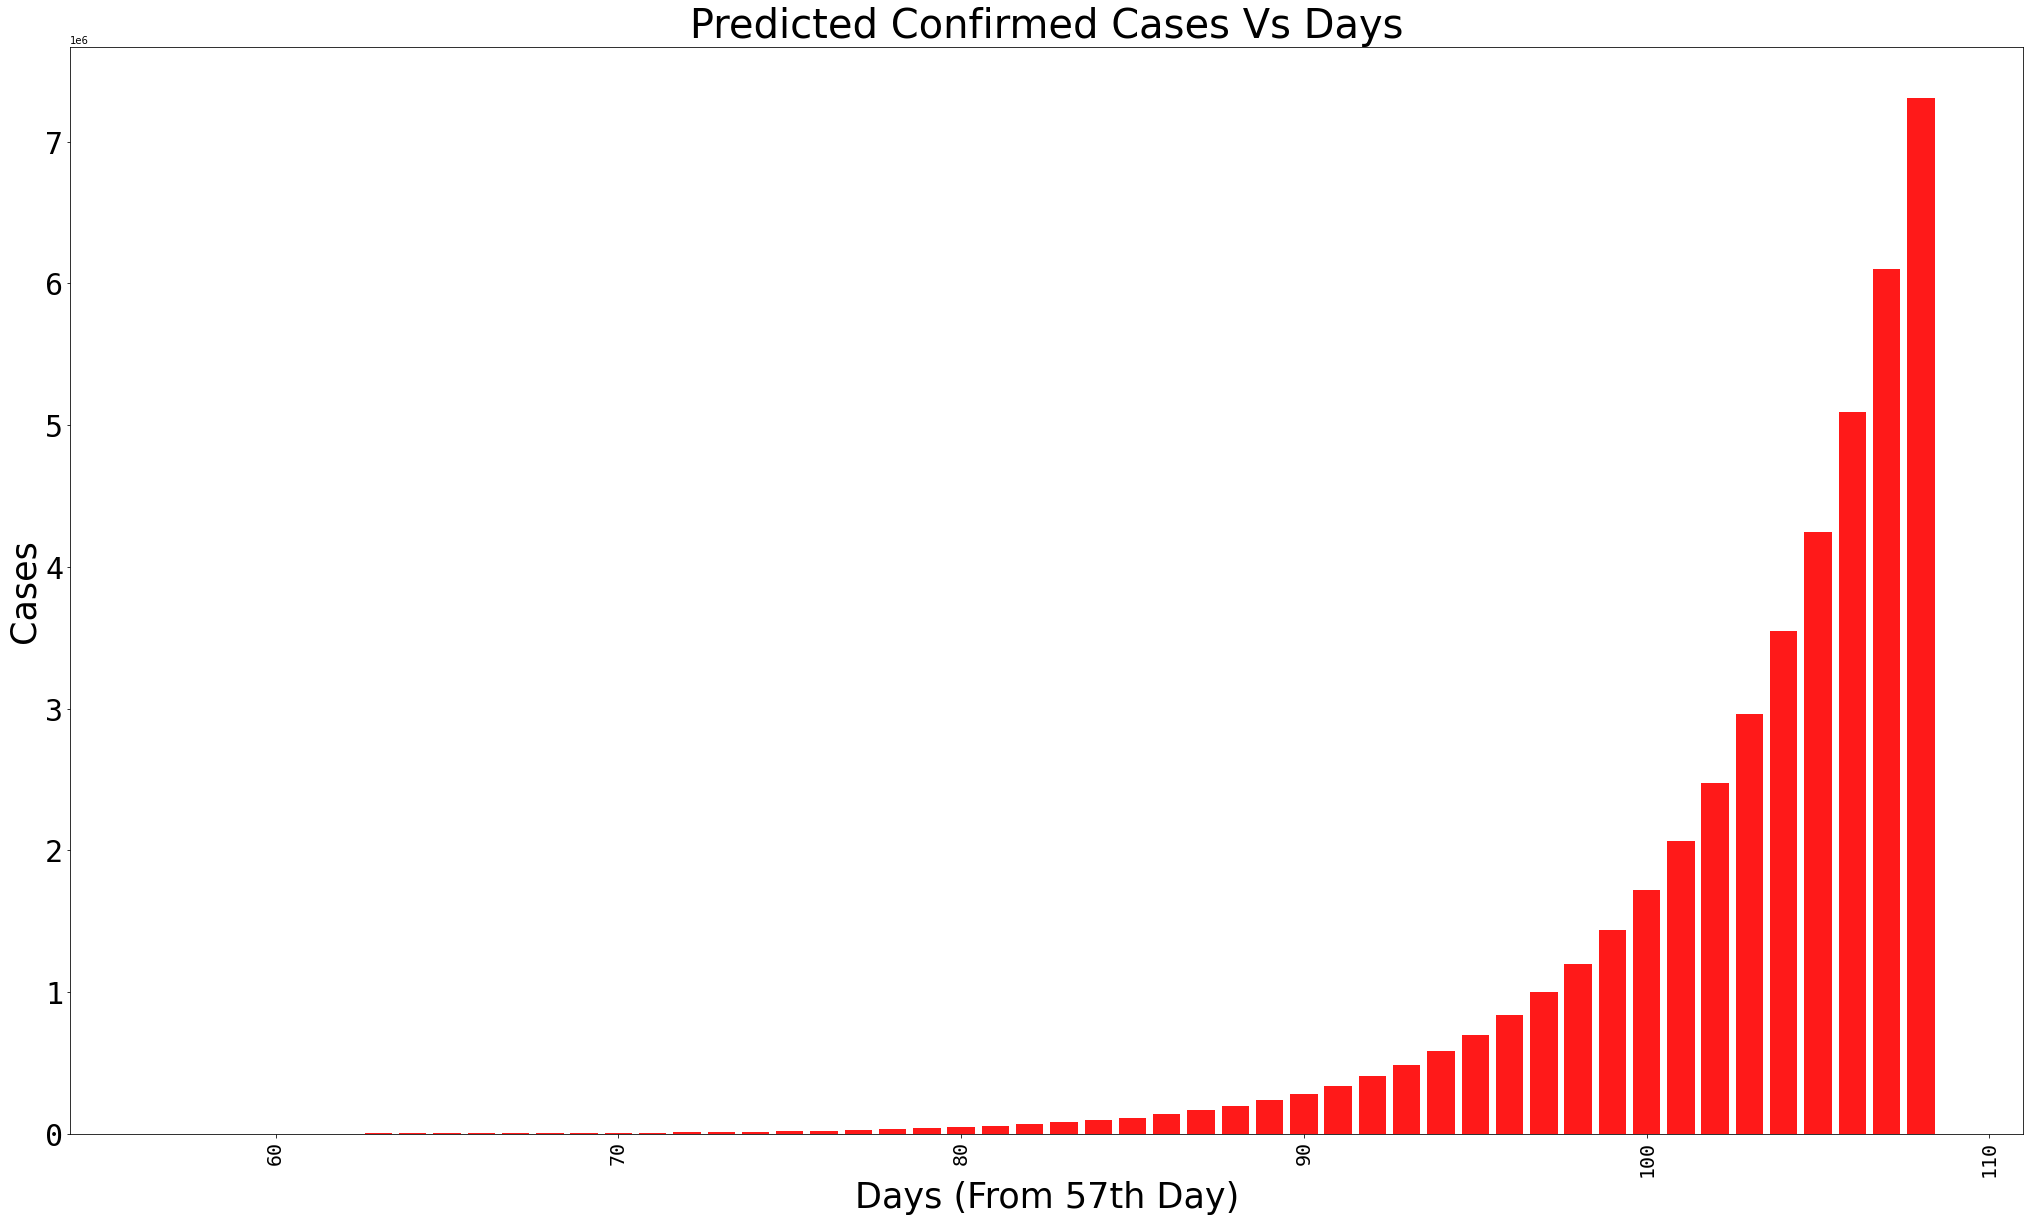

In [ ]:
plt.figure(figsize=(35,20))
plt.bar(df_preds['Day'],df_preds['Predicted'],align='center',alpha=0.9,color='red')
plt.title("Predicted Confirmed Cases Vs Days",size=40)
plt.xlabel("Days (From 57th Day)",size=35)
plt.xticks(fontsize=20,fontname='monospace',rotation=90)
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

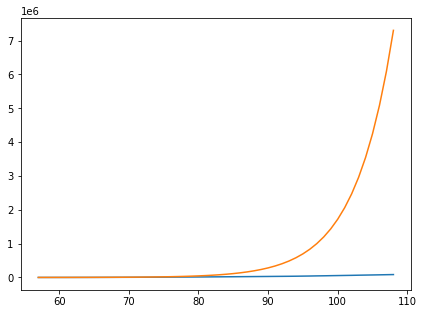

In [ ]:
plt.plot(df_preds['Day'],df_preds['Confirmed'])
plt.plot(df_preds['Day'],df_preds['Predicted'])
plt.show()

<h4>This signifies predicted values are very large as compared to the actual ones.</h4>

<p></p>
<p></p>
<p></p>

<h1>Observation</h1>

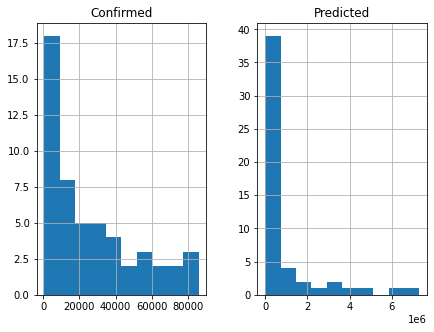

Maximum cases during lockdown: 85709
Maximum cases if there was no lockdown: 7304474
Percentage Population Saved: 98.83 %


In [ ]:
df_preds.hist(['Confirmed','Predicted'])
plt.show()
print("Maximum cases during lockdown:",df_preds['Confirmed'].max())
print("Maximum cases if there was no lockdown:",df_preds['Predicted'].max())
print("Percentage Population Saved:",round((df_preds['Predicted'].max()-df_preds['Confirmed'].max())/df_preds['Predicted'].max()*100,2),"%")

<h1>Result</h1>

<p>Our estimations show that due to lockdown, 98.83% of India's population was saved from being infected by COVID-19. This clearly signifies that <i><b>lockdown was successful in its implementation, and proves out to be a correct decision, obviously!</b></i>